## Homework

1. Download and plot 3 apparently related sets of data with at least. Each set should contain at least two related variables. You should explain *how* variables in each set of data are related. Plot each set using the scatter plot function *and* the line graph function. For example, you might the obseved rate of unemployement and the natural rate of unemployment in the same graph. To find data, search for data at FRED and use the code associated with the data. For example, the [CPI measure that includes urban items](https://fred.stlouisfed.org/series/CPIAUCSL) is identified by the code, *CPIAUCSL*.

2. Create a correlation matrix for quarterly observations of Nominal GDP, Real GDP, the Price Level (CPI or GDP Deflator), the quantity of currency in circulation and the federal funds rate for as large of a date range as possible. Then, calculate the year-over-year percent change for each each variable and save the results as variables in the same dataframe. Create a correlation matrix for these new variables.

How has the correlation between each variable changed? Why do you think the correlation changes after calculate the year-over-year percent change?

## 1

In [1]:
import os 
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def gather_data(data_codes,
               start,
               end = datetime.datetime.today(),
               freq= "M"):
    df_int =False 
    for key, code in data_codes.items():
        if df_int == False:
            df =web.DataReader(
            code, "fred", start, end).resample(freq).mean()
            #.first() or .last()
            df.rename(columns = {code:key},inplace=True)
            df_int=True
        else:
            df[key] = web.DataReader(code, "fred", start, end).resample(freq).mean()
            
        
    return df

<AxesSubplot:xlabel='DATE'>

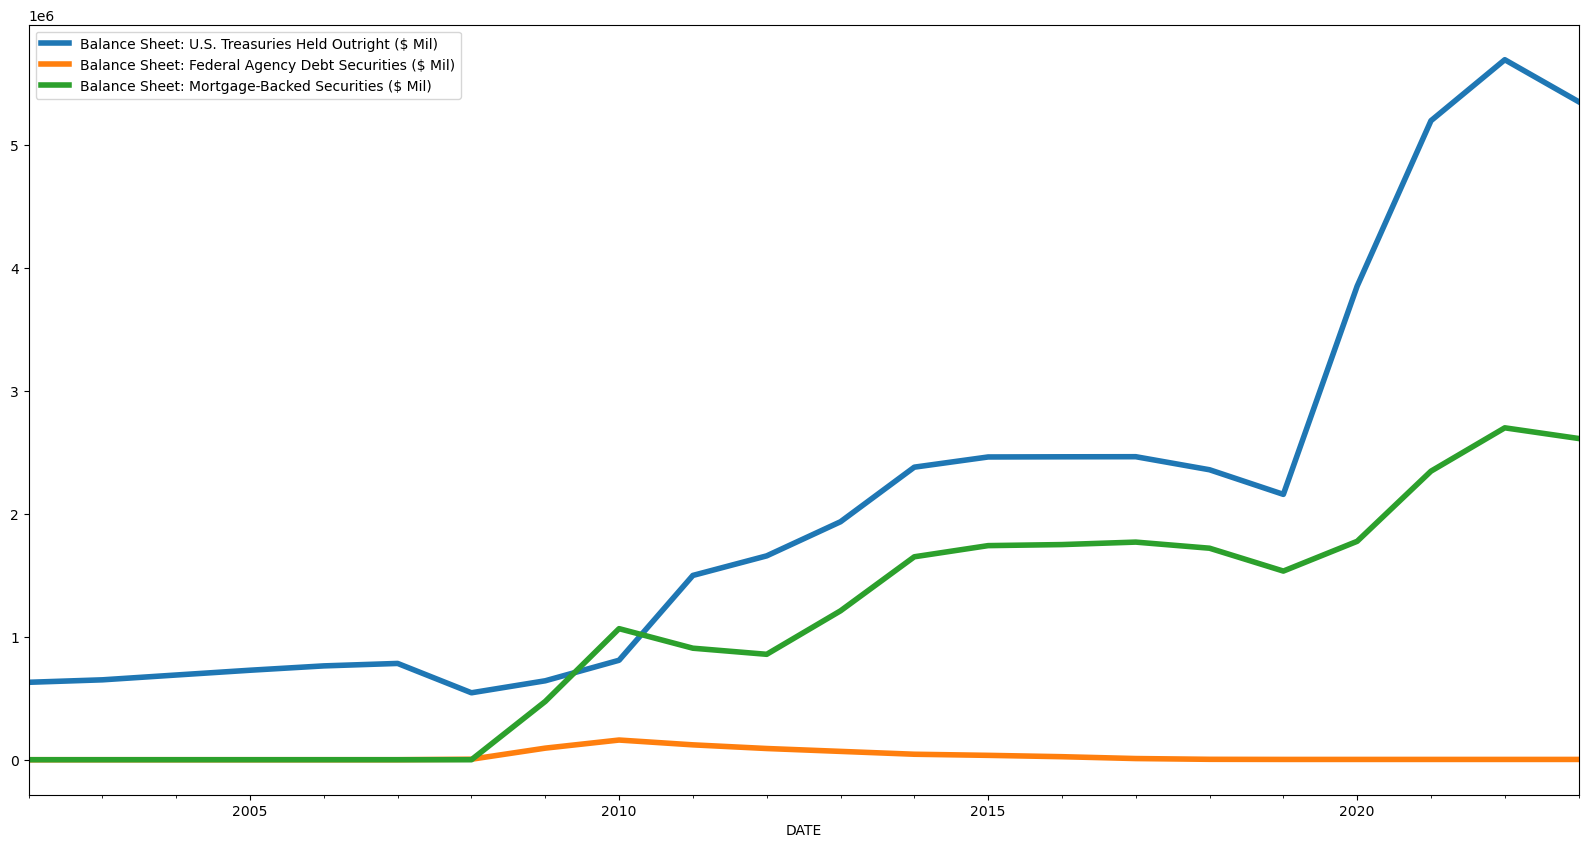

In [58]:
 ### breakdown of securities holdings ###
data_codes ={"Balance Sheet: U.S. Treasuries Held Outright ($ Mil)":"WSHOTSL",
             "Balance Sheet: Federal Agency Debt Securities ($ Mil)" : "WSHOFADSL",
             "Balance Sheet: Mortgage-Backed Securities ($ Mil)": "WSHOMCB"}
start = datetime.datetime(2000,1,1)
end=datetime.datetime.today()
data= gather_data(data_codes=data_codes,
                 start= start,
                 end=end,
                 freq ="Y")
fig, ax=plt.subplots(figsize=(20,10))
data.plot.line(linewidth=4,ax=ax)

Balance Sheet: U.S. Treasuries Held Outright ($ Mil) Balance Sheet: Federal Agency Debt Securities ($ Mil) Balance Sheet: Mortgage-Backed Securities ($ Mil)


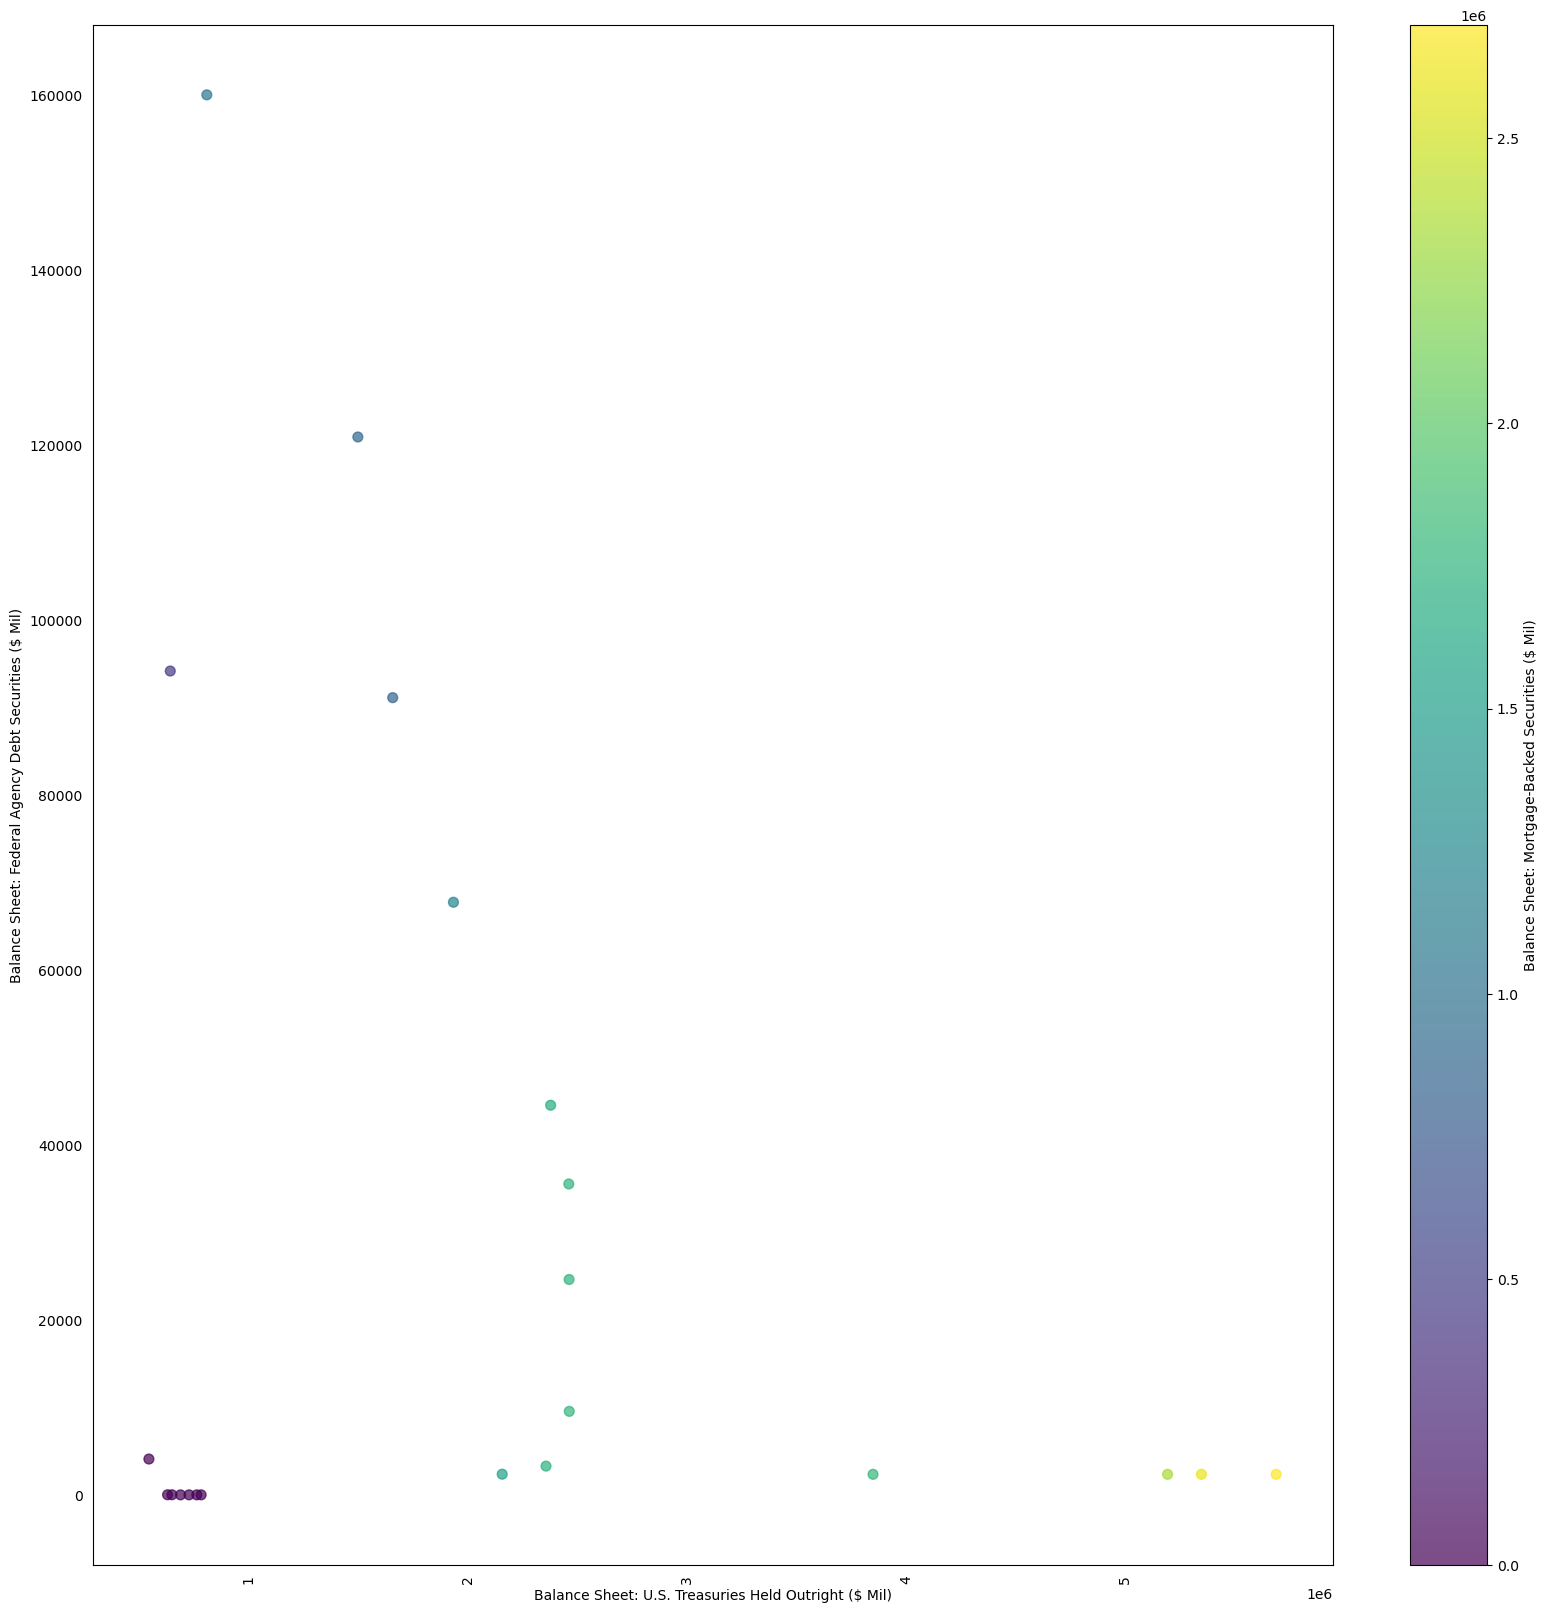

Balance Sheet: U.S. Treasuries Held Outright ($ Mil) Balance Sheet: Mortgage-Backed Securities ($ Mil) Balance Sheet: Federal Agency Debt Securities ($ Mil)


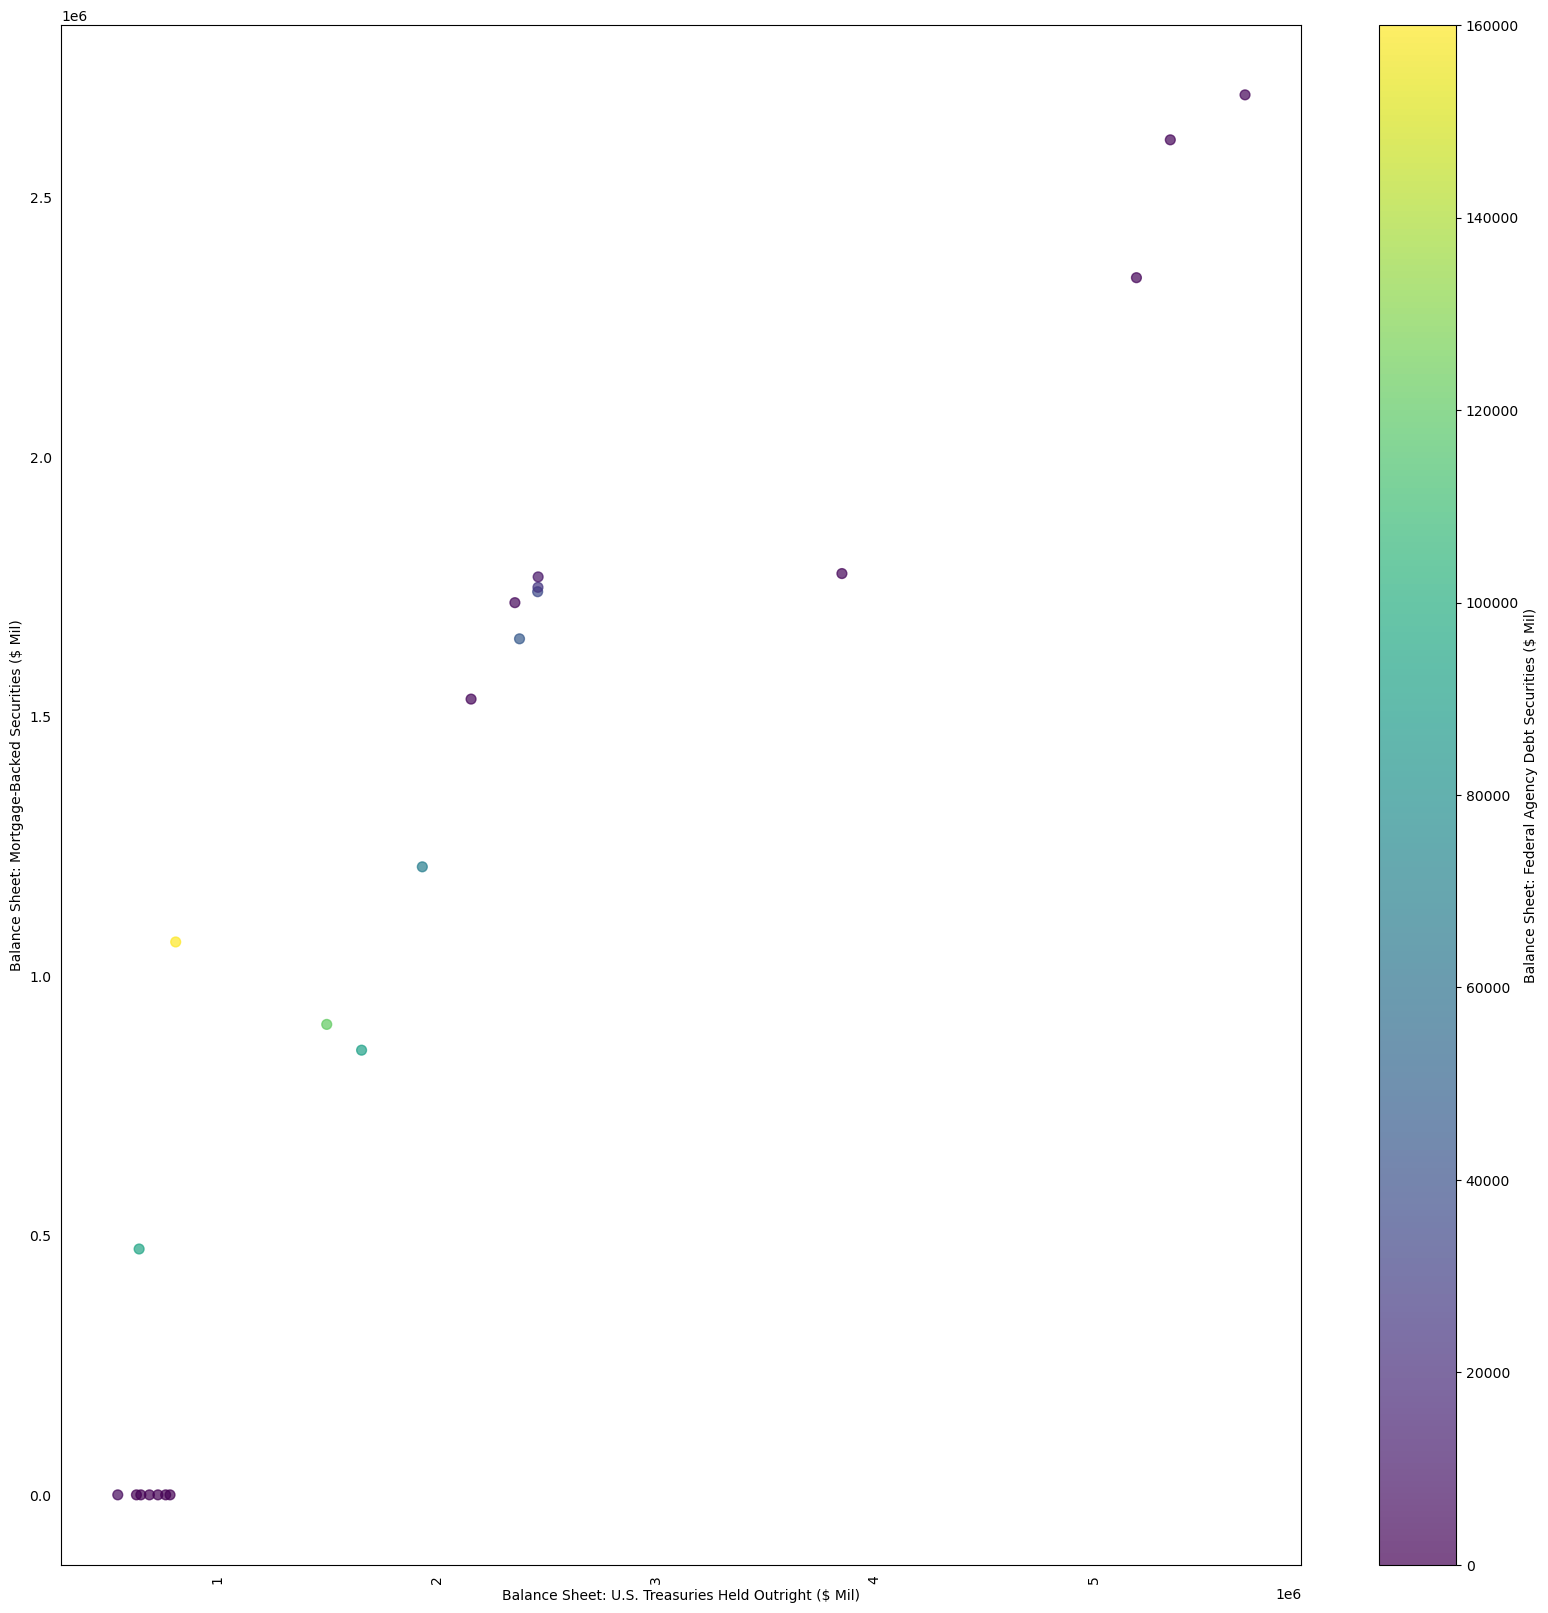

Balance Sheet: Federal Agency Debt Securities ($ Mil) Balance Sheet: U.S. Treasuries Held Outright ($ Mil) Balance Sheet: Mortgage-Backed Securities ($ Mil)


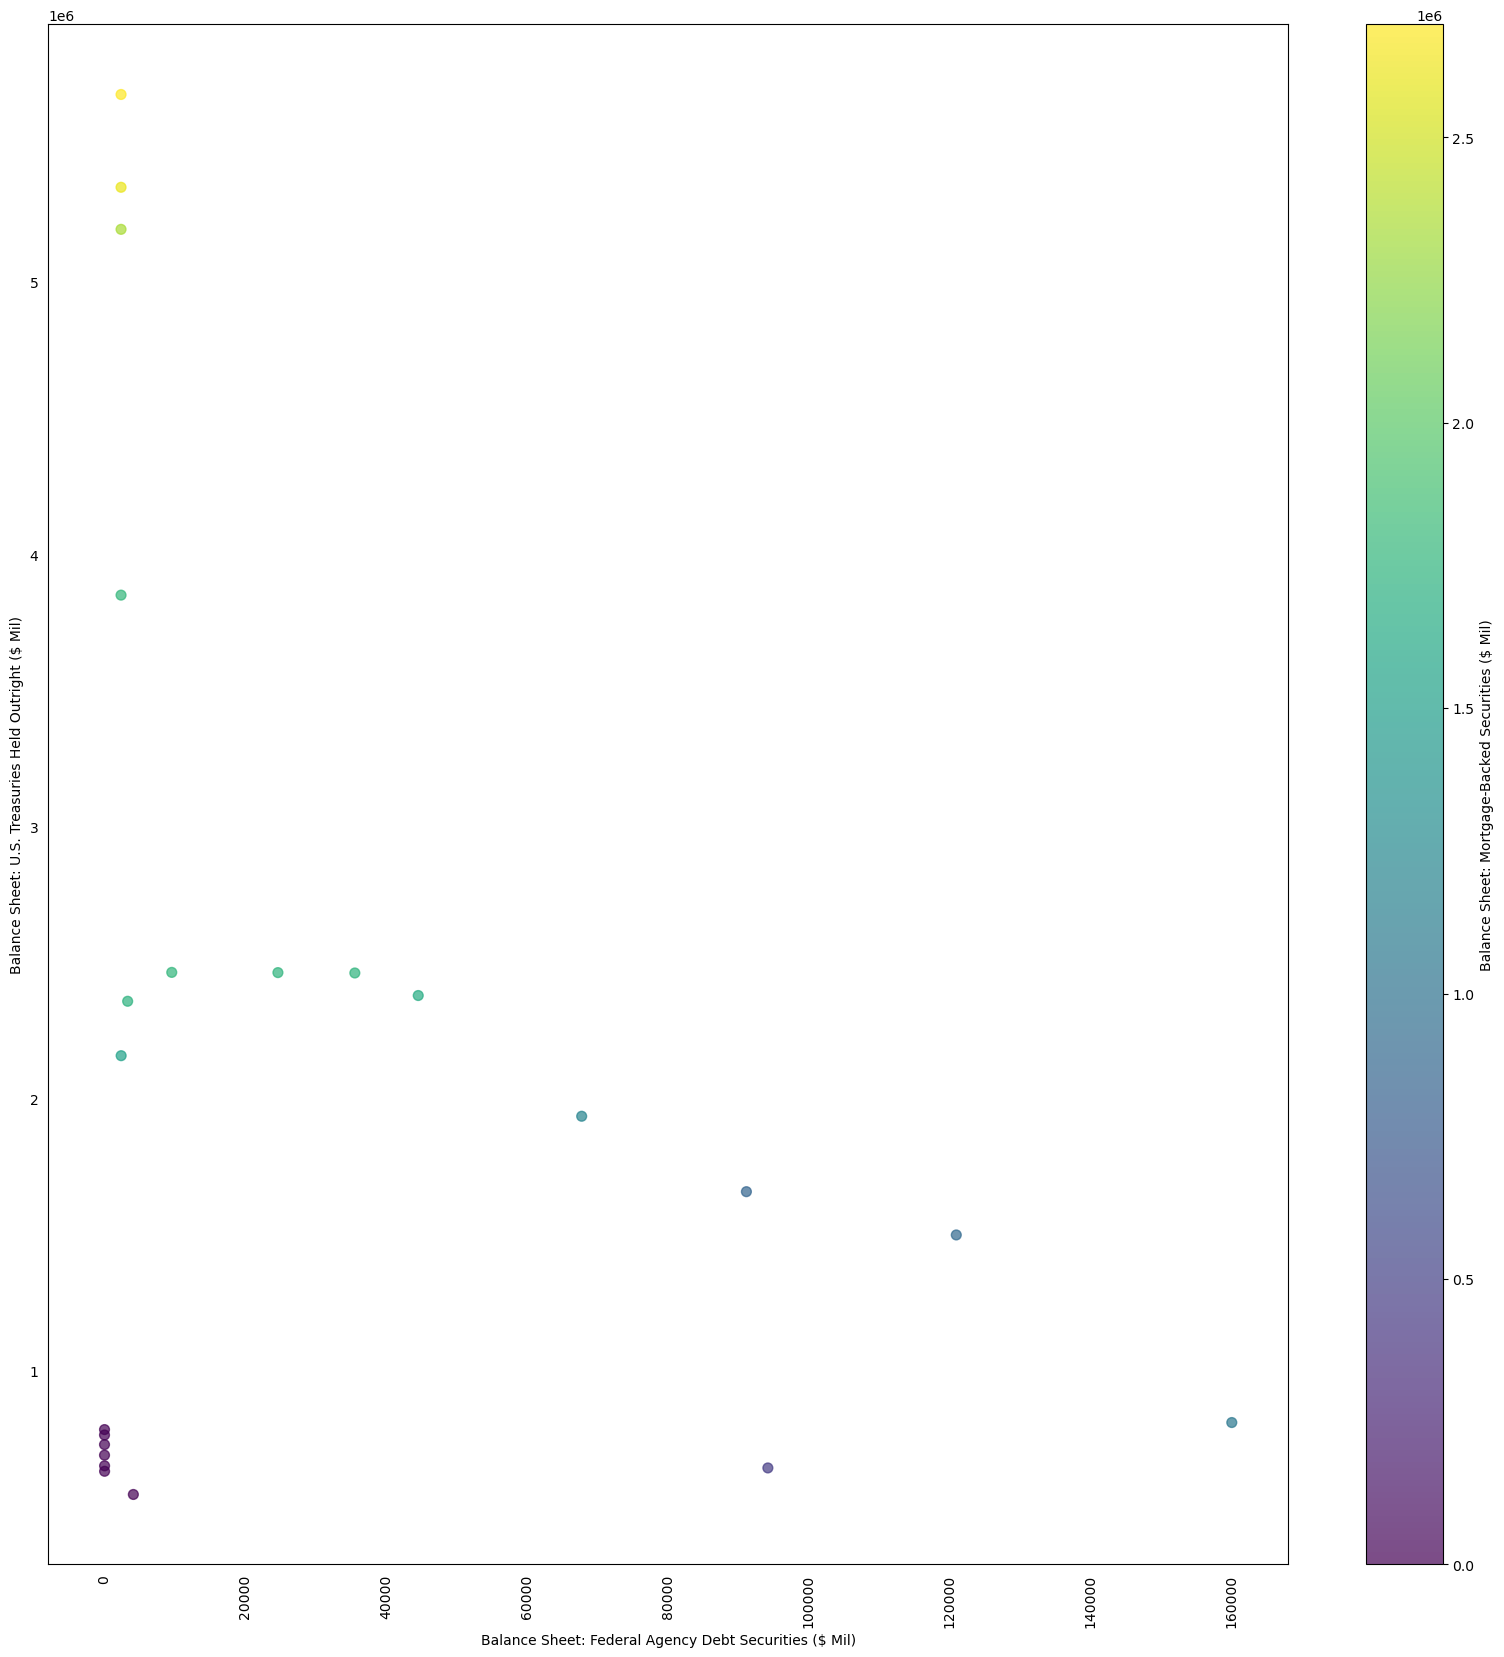

Balance Sheet: Federal Agency Debt Securities ($ Mil) Balance Sheet: Mortgage-Backed Securities ($ Mil) Balance Sheet: U.S. Treasuries Held Outright ($ Mil)


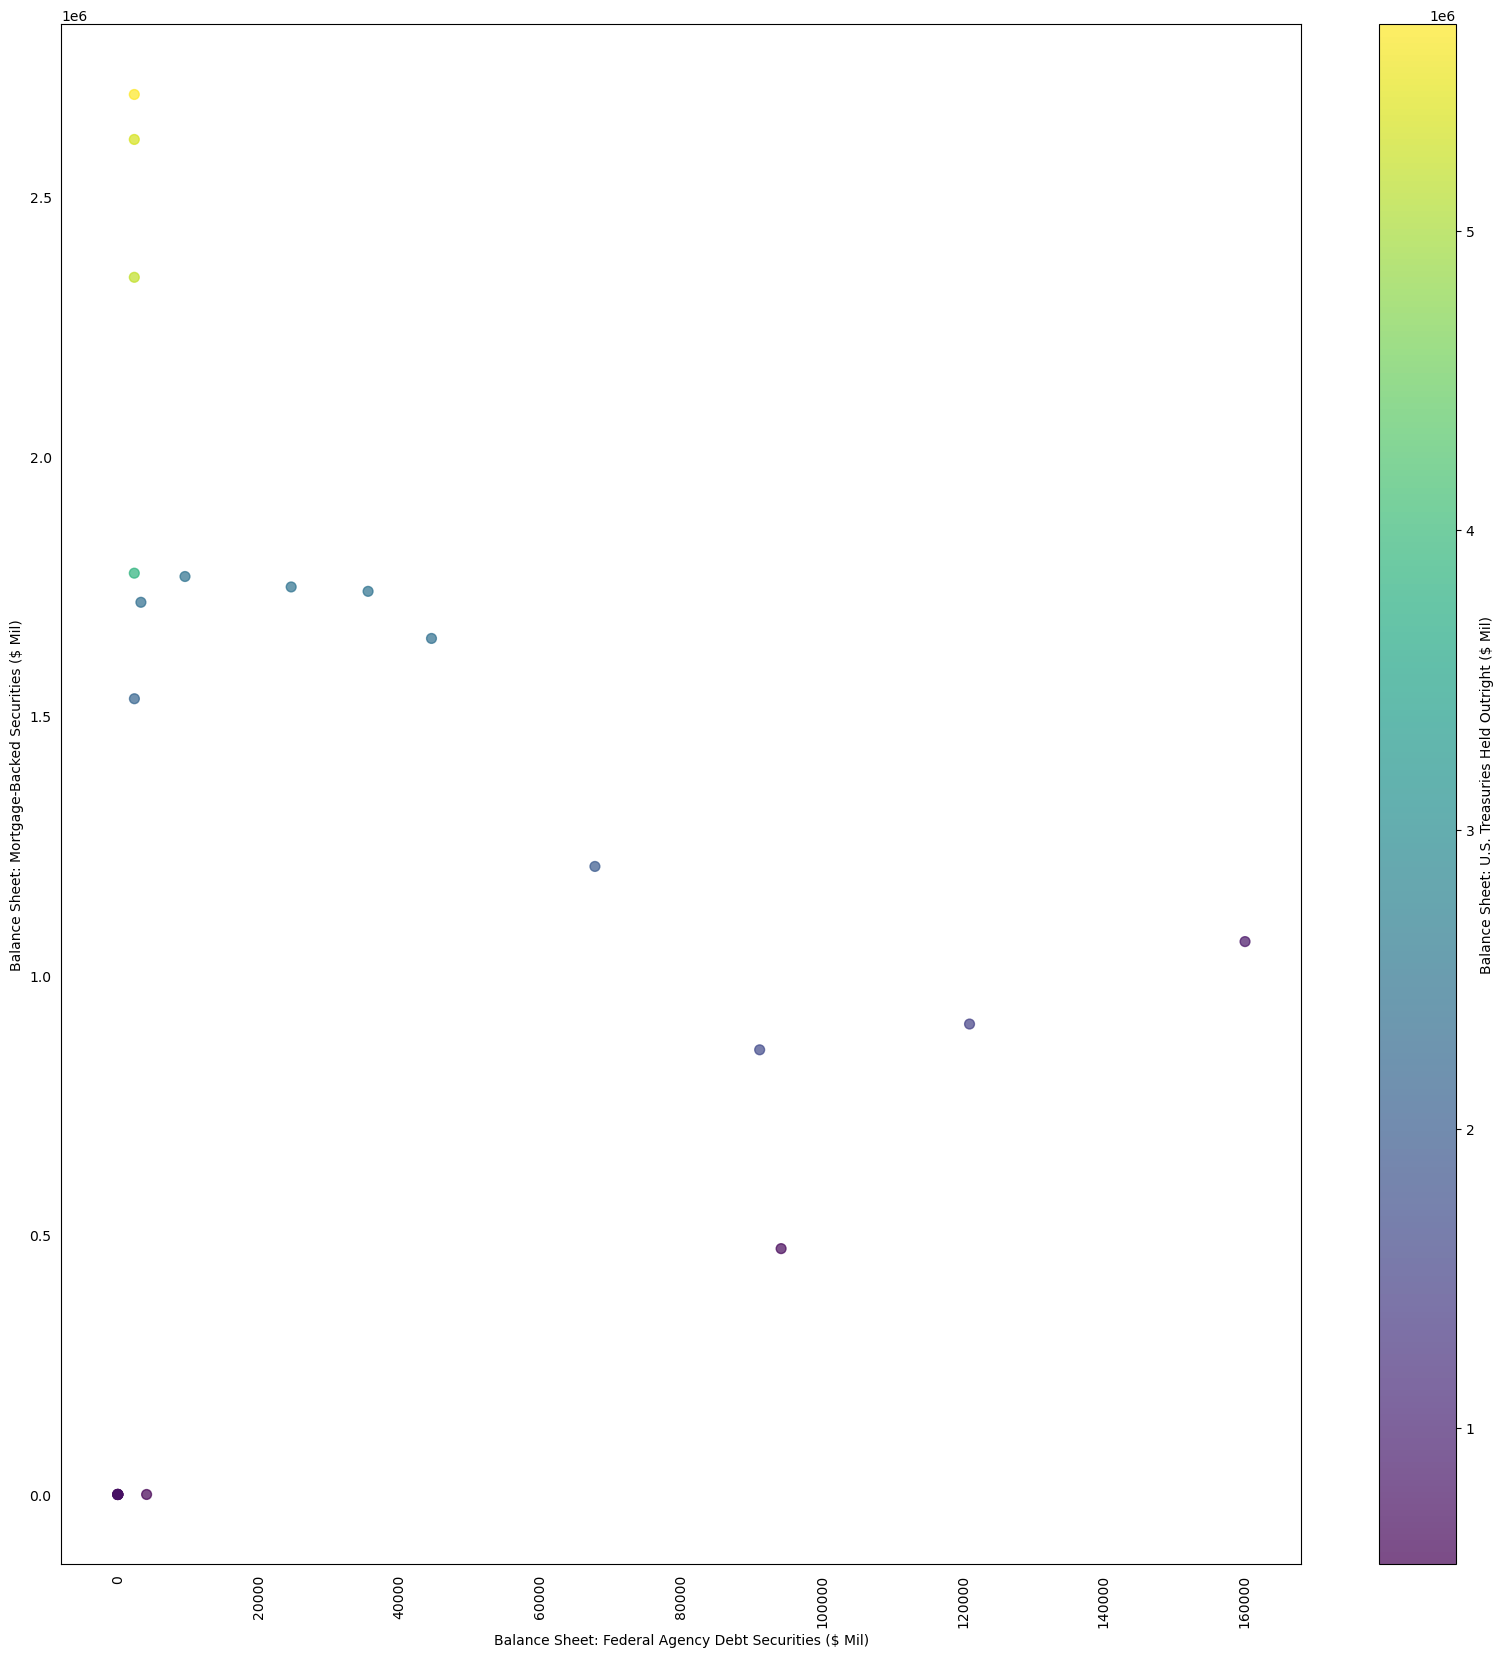

Balance Sheet: Mortgage-Backed Securities ($ Mil) Balance Sheet: U.S. Treasuries Held Outright ($ Mil) Balance Sheet: Federal Agency Debt Securities ($ Mil)


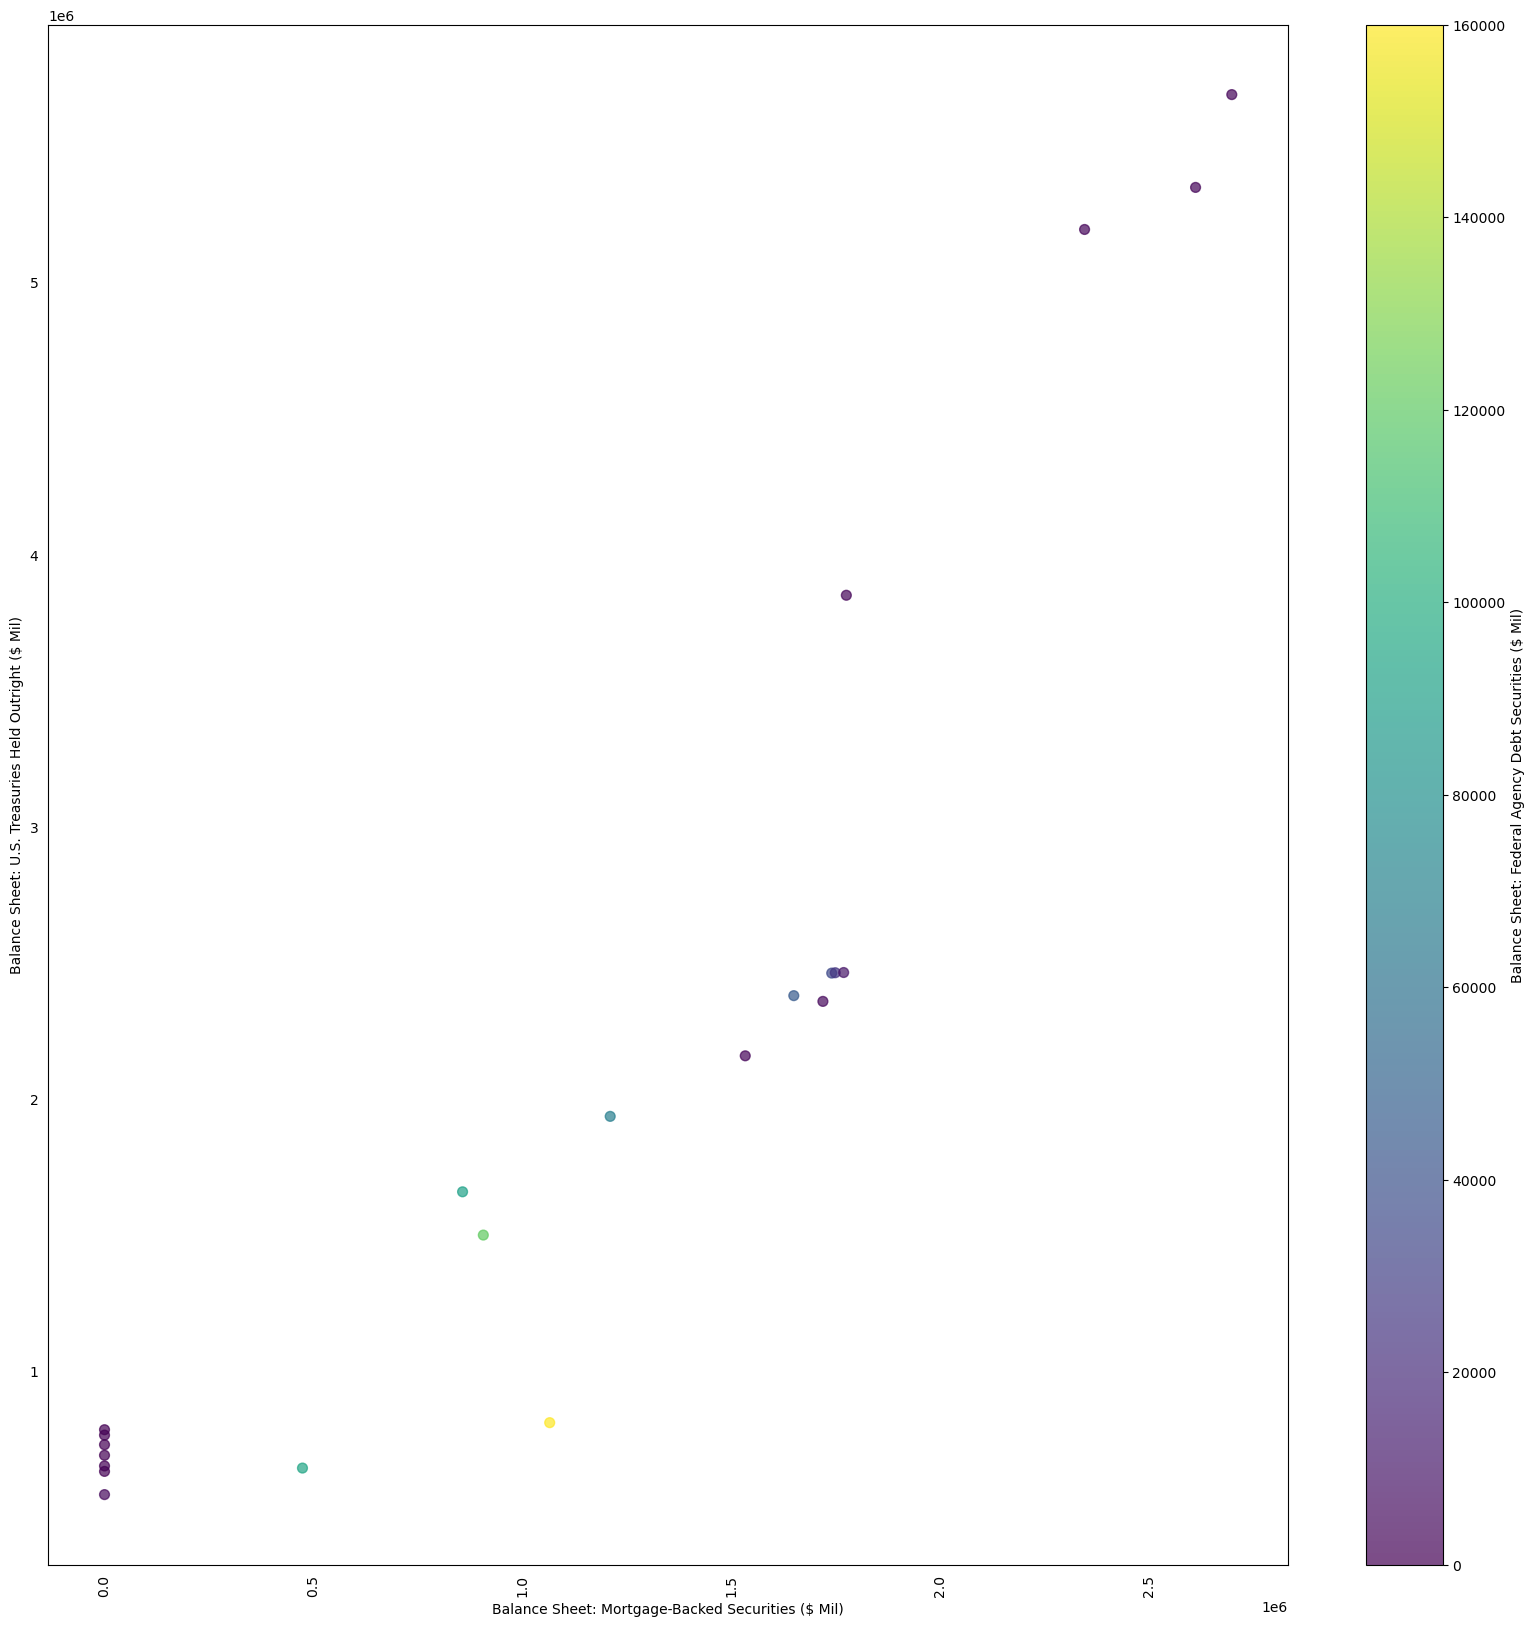

Balance Sheet: Mortgage-Backed Securities ($ Mil) Balance Sheet: Federal Agency Debt Securities ($ Mil) Balance Sheet: U.S. Treasuries Held Outright ($ Mil)


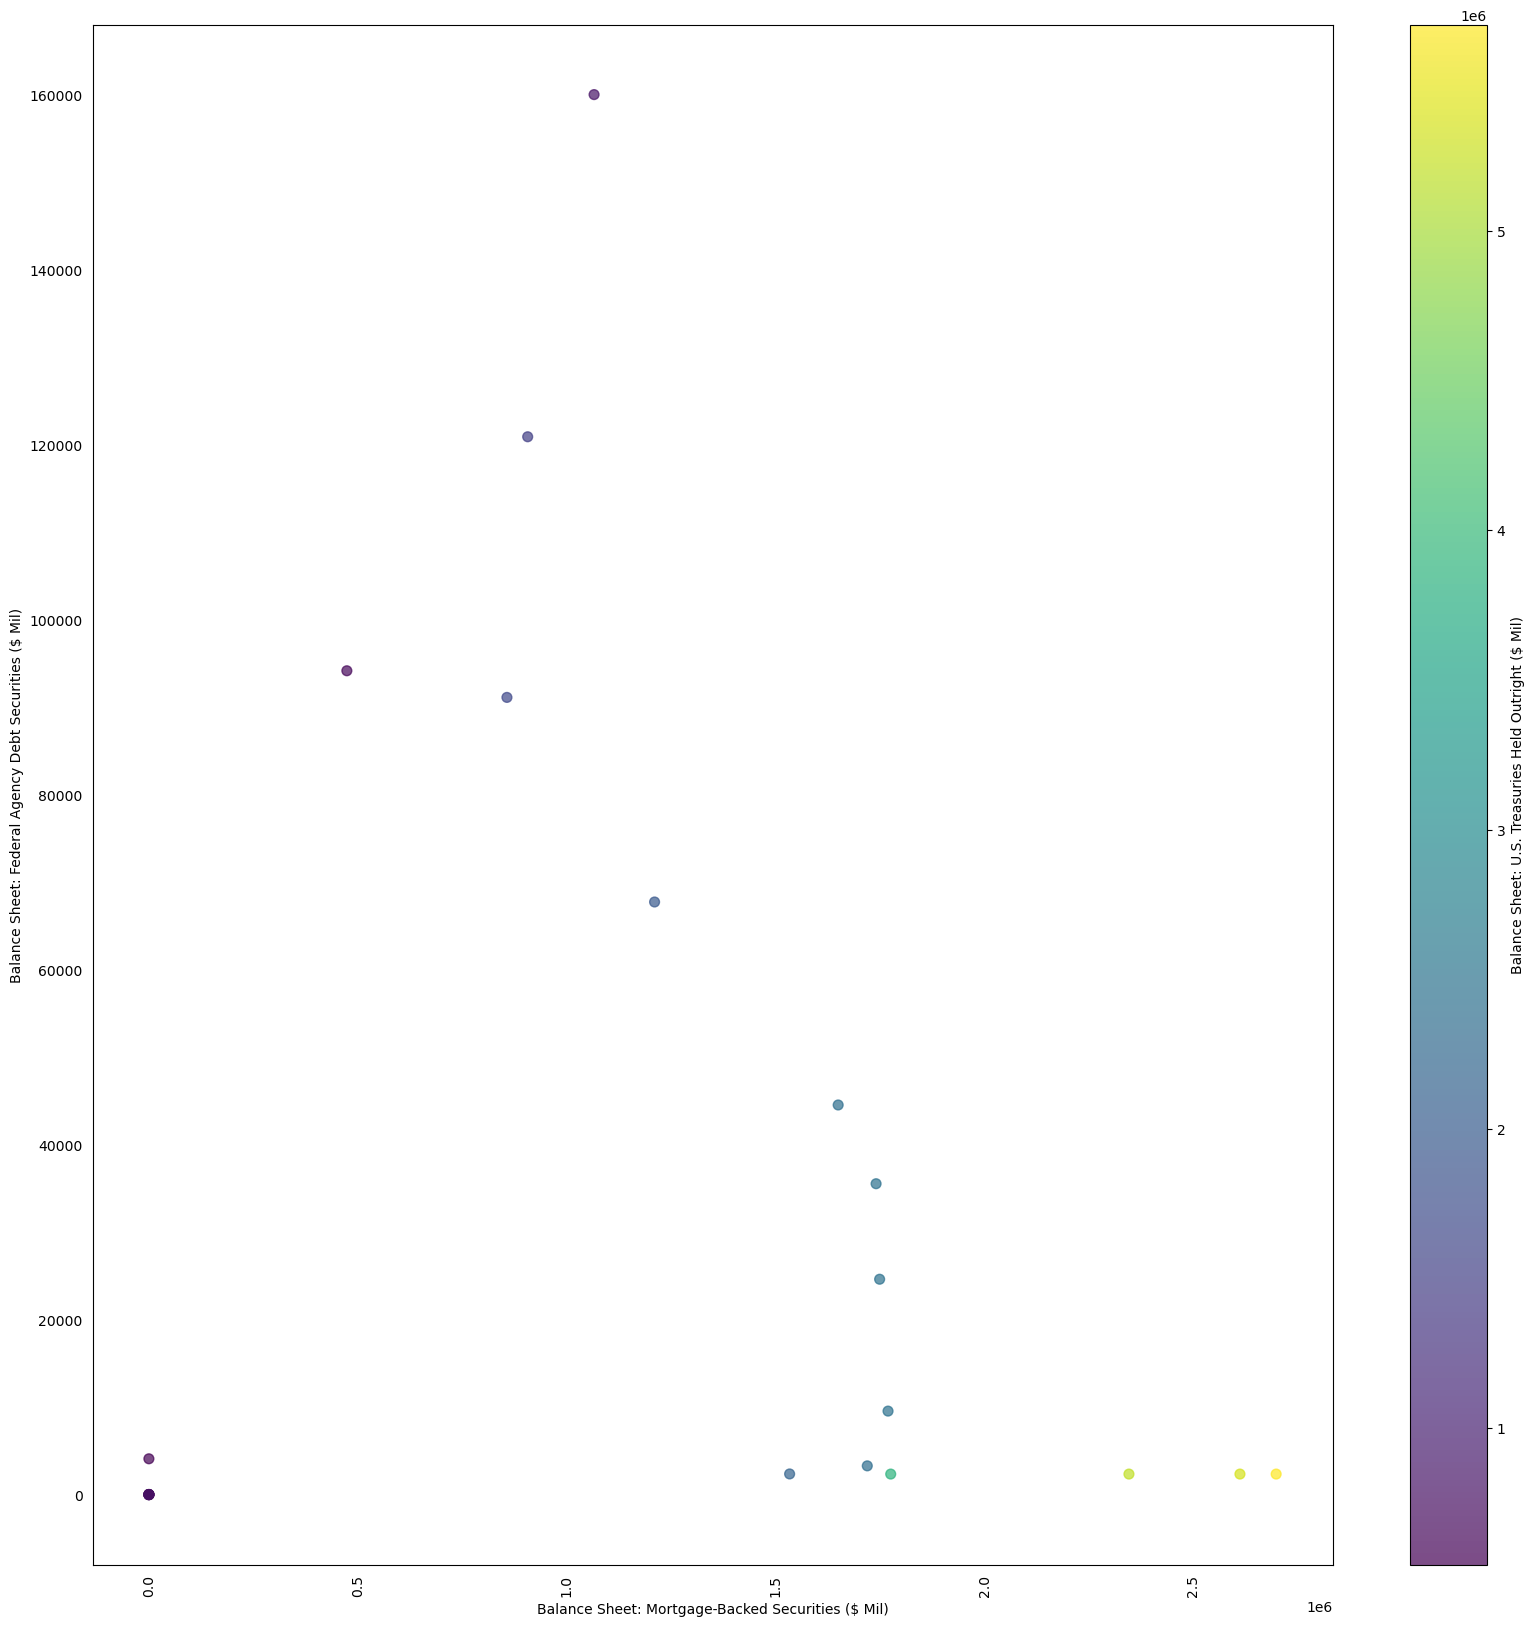

In [59]:
def color_dim_scatter(data, pp):  
    # function uses color as dimension in scatter plot  
    for key1 in data:  
        for key2 in data:  
            # do not use same variable for x and y dimension  
            for key3 in data:  
                    # do not create visualization if key1 or key2  
                    # equals key3  
                    if key1 != key2 and key1 != key3 and key2 != key3:  
                        print(key1,key2,key3)
                        # Choose figure size and save ax as object  
                        fig, ax = plt.subplots(figsize = (20, 20))  
                        # each point represents an observation with 3 different  
                        # values: key1 on the horiz ax, key2 on the vert ax,   
                        # and key3 as color  
                        data.plot.scatter(x = key1, y = key2, c = key3, s = 50,  
                                          alpha = .7, colormap = "viridis",  
                                          ax = ax)  
                        # Make values on x-axis vertical  
                        plt.xticks(rotation = 90)  
                        # Remove tick lines  
                        plt.setp(ax.get_xticklines(), visible = False)  
                        plt.setp(ax.get_yticklines(), visible = False)  
                        plt.show()    
                        plt.close() 
color_dim_scatter(data, data)

The varibles are related because they are all part of the securities that the fed holds

<AxesSubplot:xlabel='DATE'>

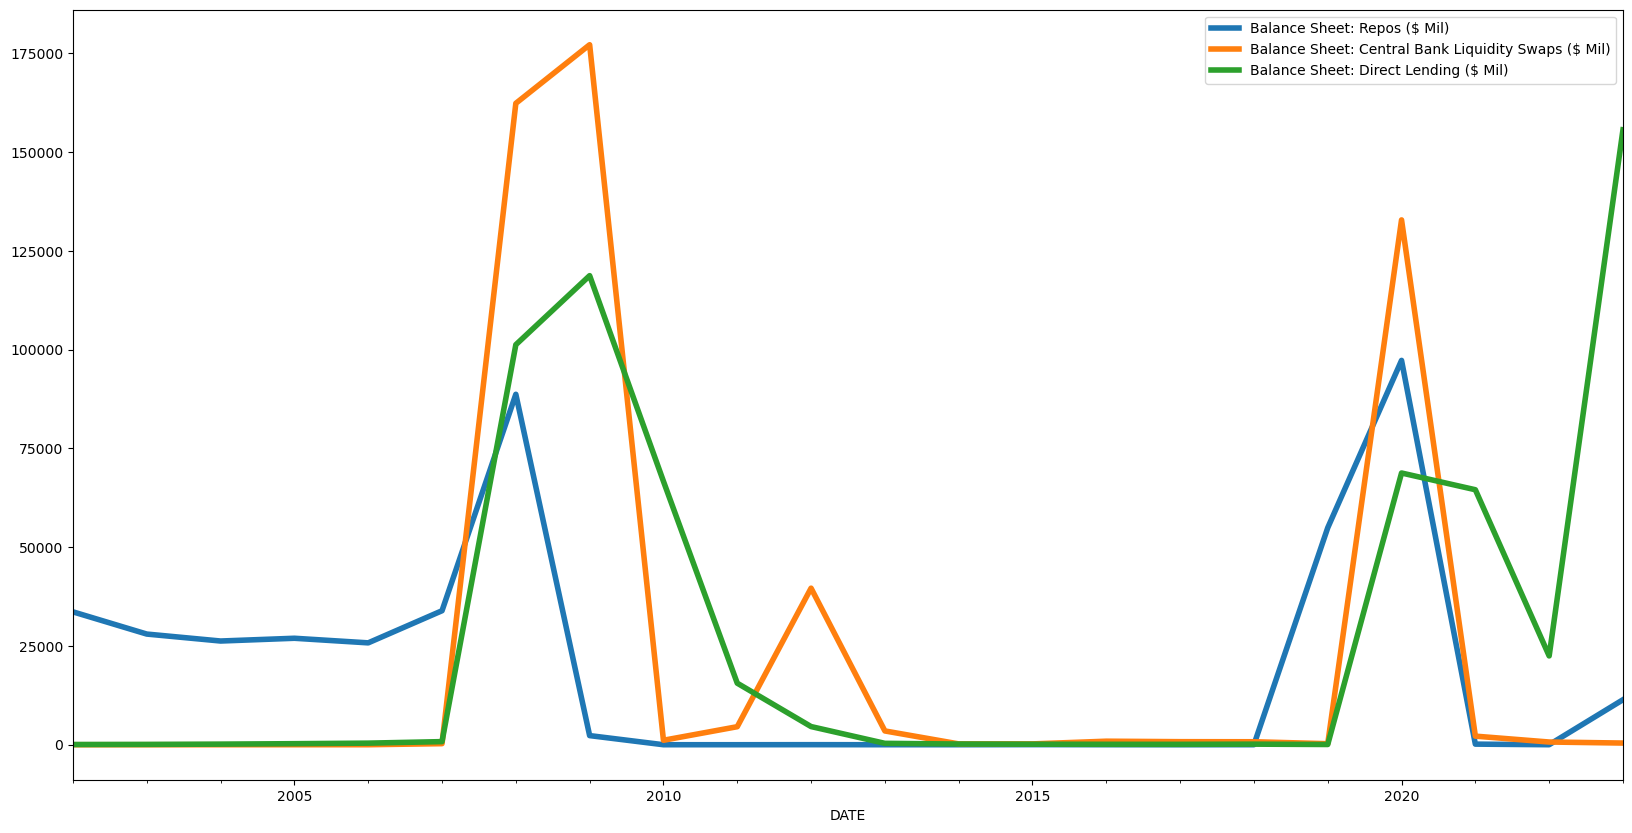

In [60]:
 # other forms of lending
data_codes1={"Balance Sheet: Repos ($ Mil)": "WORAL",
            "Balance Sheet: Central Bank Liquidity Swaps ($ Mil)" : "SWPT",
            "Balance Sheet: Direct Lending ($ Mil)" : "WLCFLL"}
start = datetime.datetime(2000,1,1)
end=datetime.datetime.today()
data1= gather_data(data_codes=data_codes1,
                 start= start,
                 end=end,
                 freq ="Y")
fig, ax=plt.subplots(figsize=(20,10))
data1.plot.line(linewidth=4,ax=ax)

The reason that these data is simular is that it is all the forms of lending that the fed can do.

Balance Sheet: Repos ($ Mil) Balance Sheet: Central Bank Liquidity Swaps ($ Mil) Balance Sheet: Direct Lending ($ Mil)


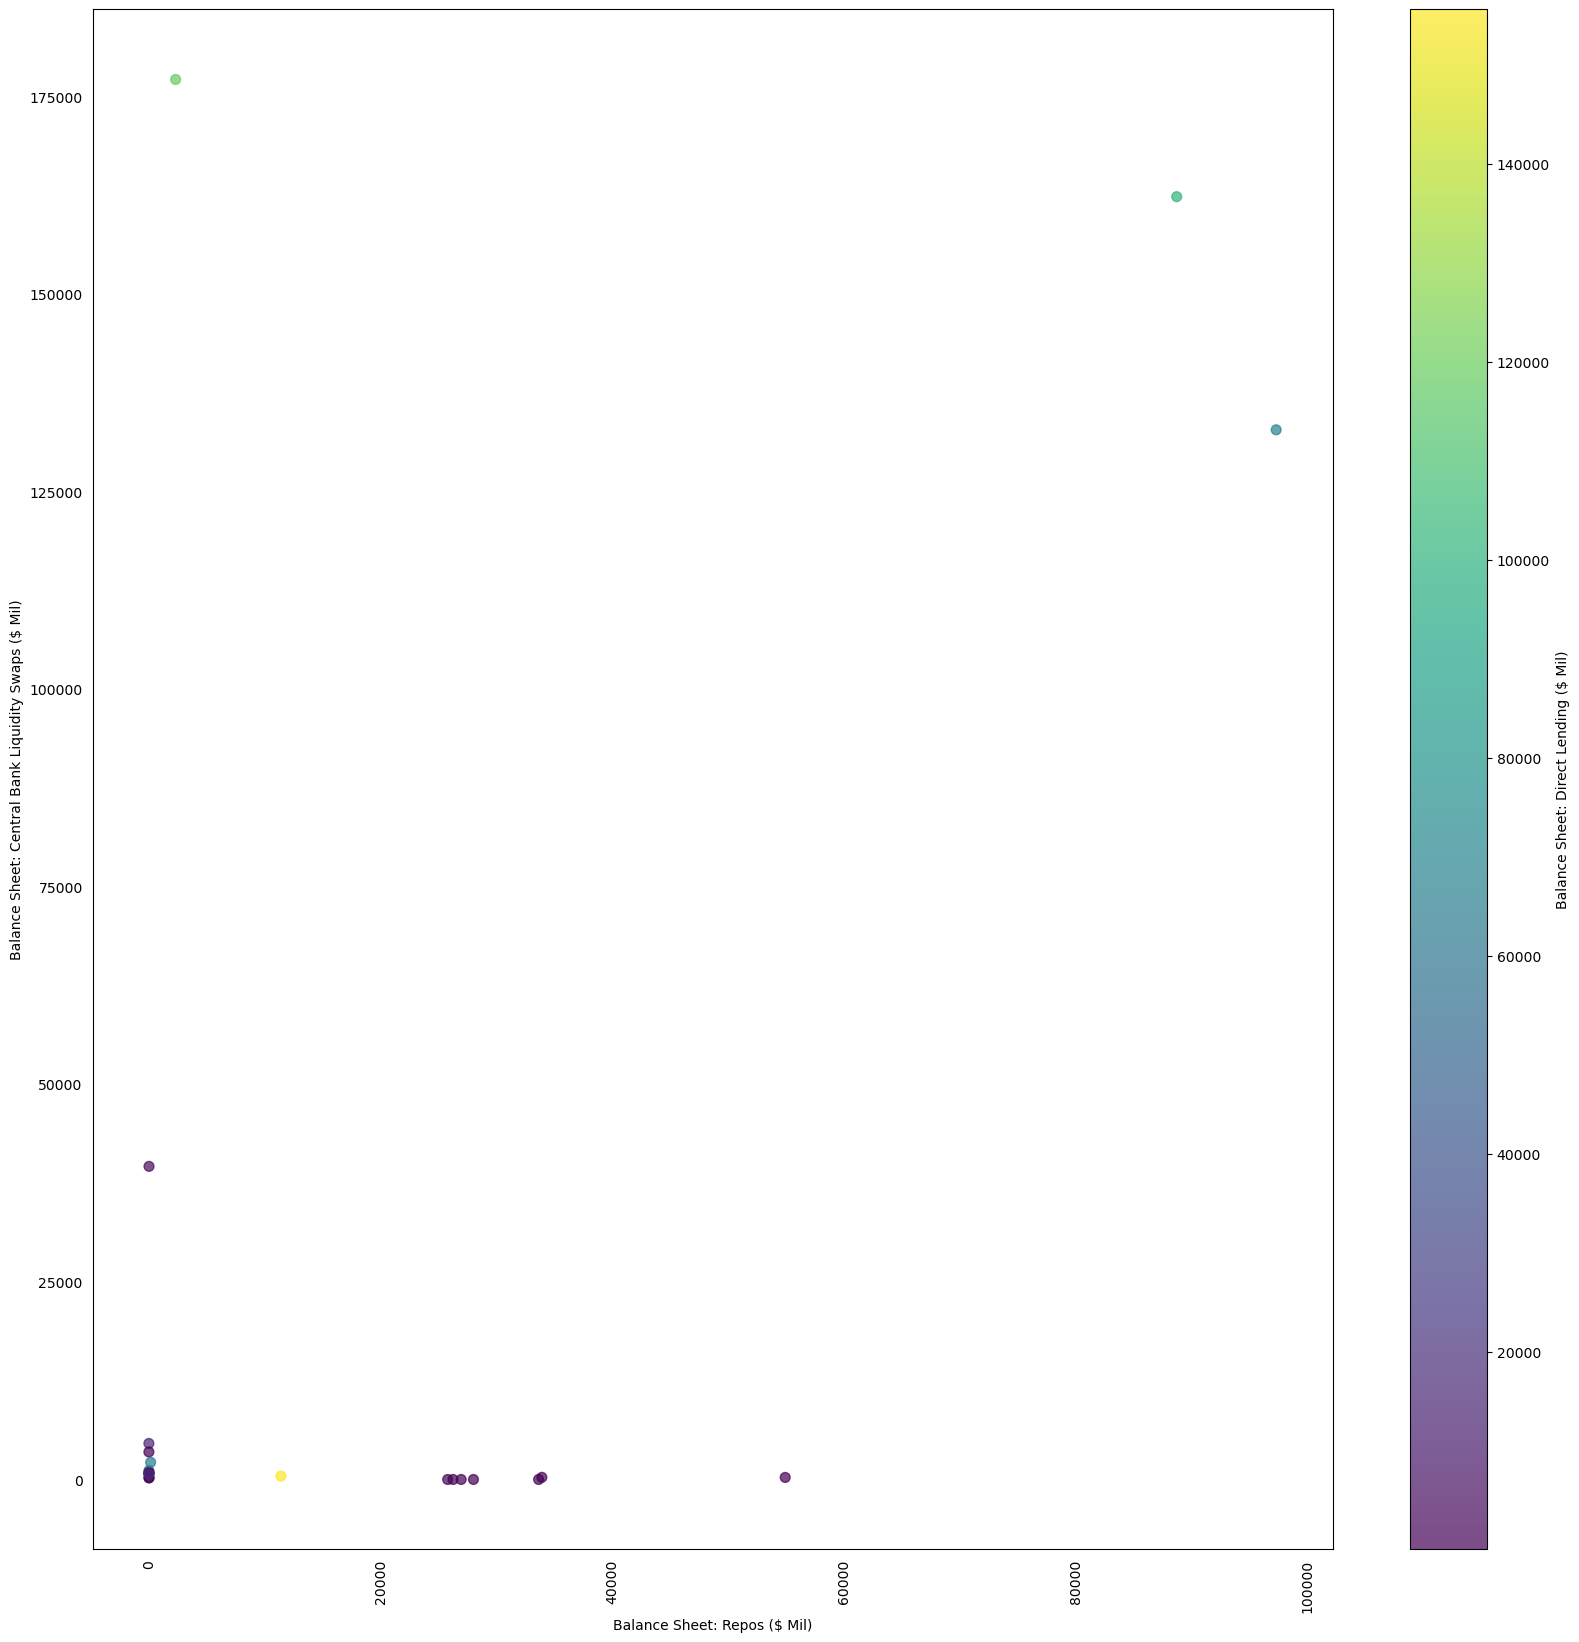

Balance Sheet: Repos ($ Mil) Balance Sheet: Direct Lending ($ Mil) Balance Sheet: Central Bank Liquidity Swaps ($ Mil)


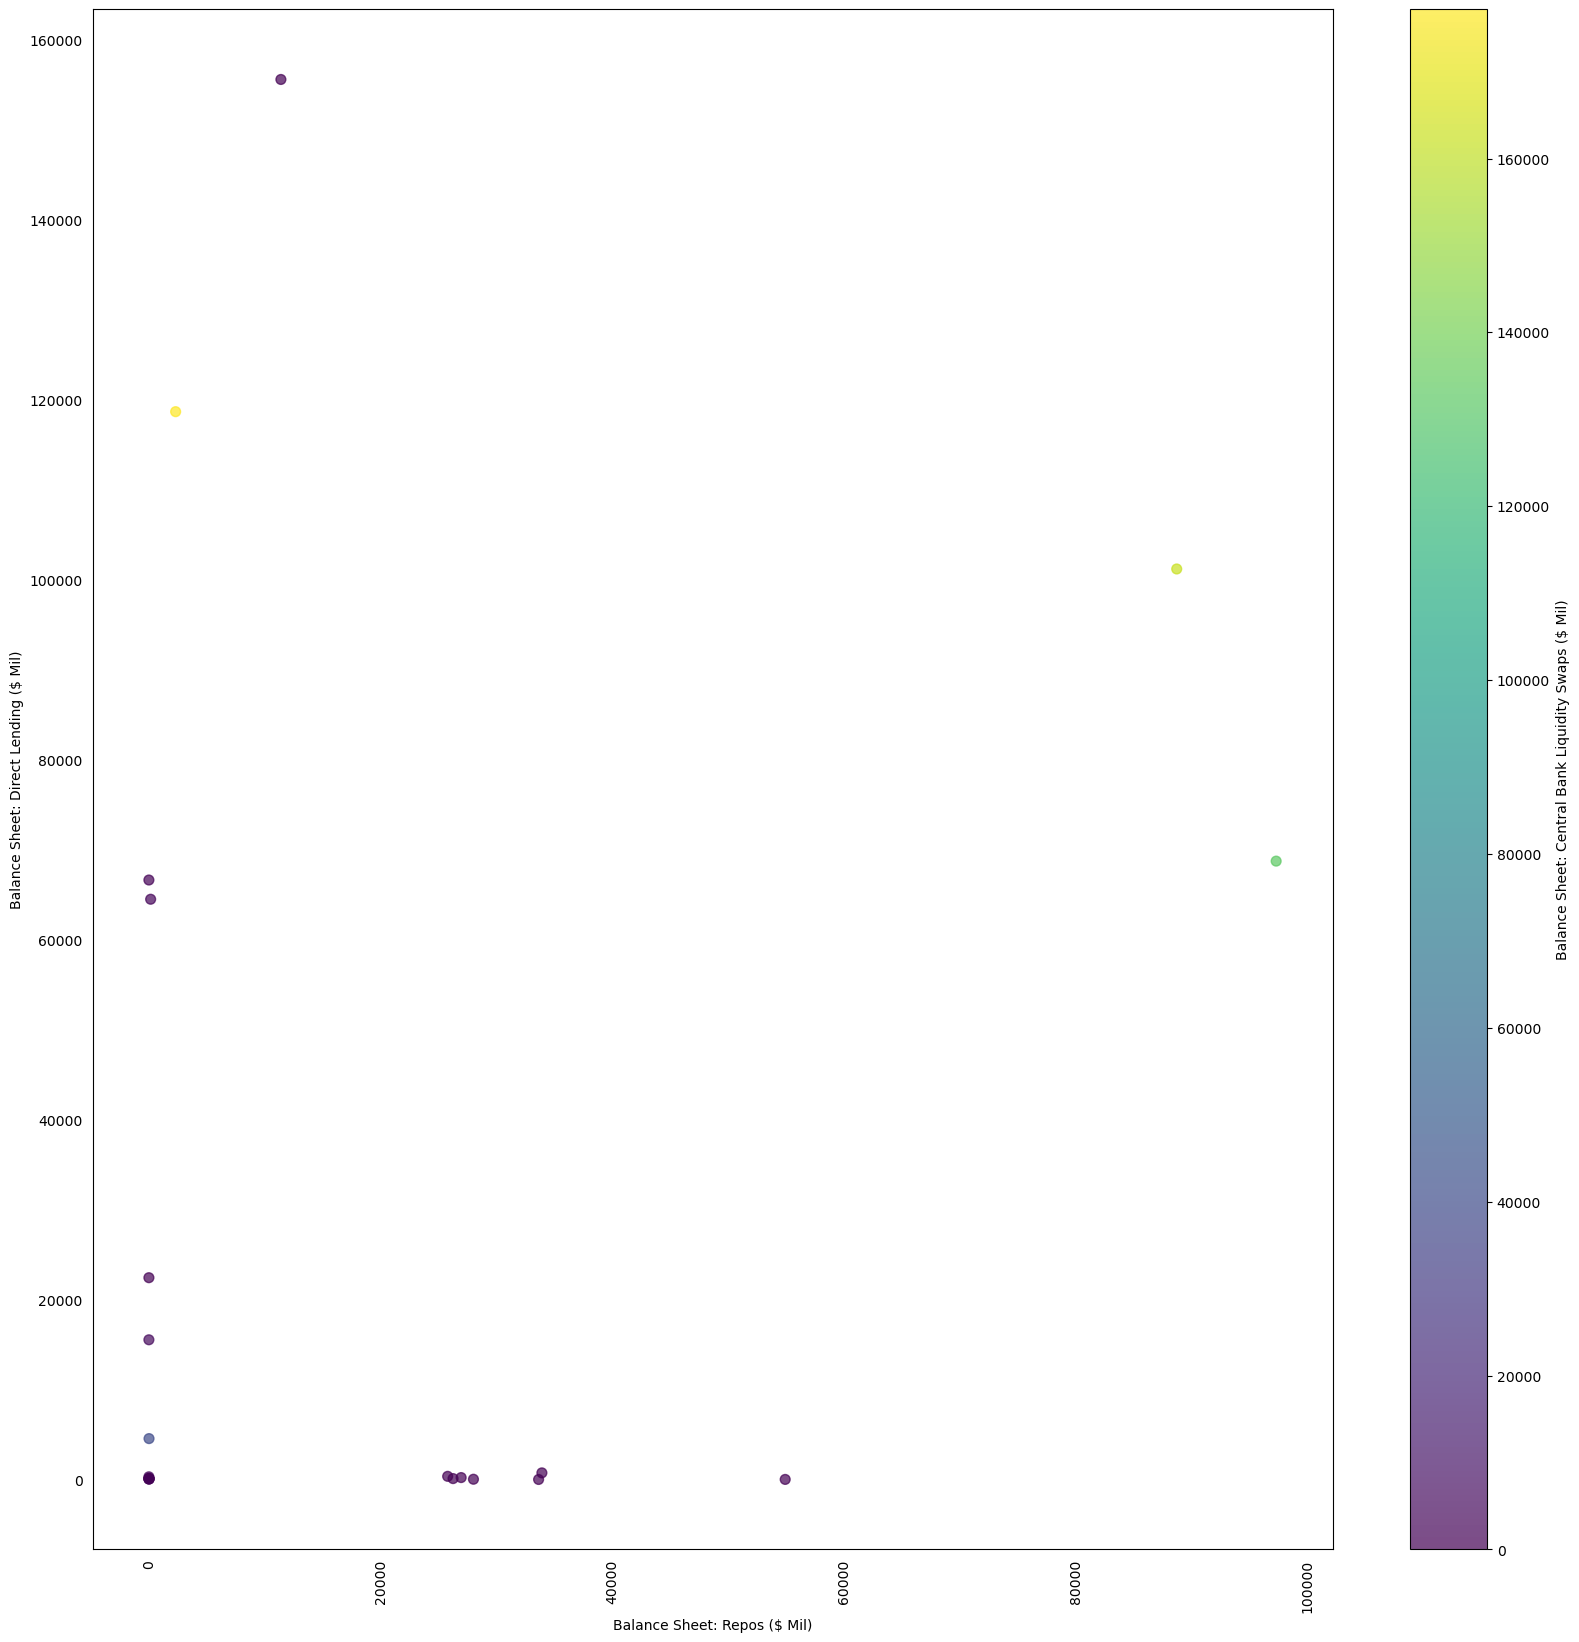

Balance Sheet: Central Bank Liquidity Swaps ($ Mil) Balance Sheet: Repos ($ Mil) Balance Sheet: Direct Lending ($ Mil)


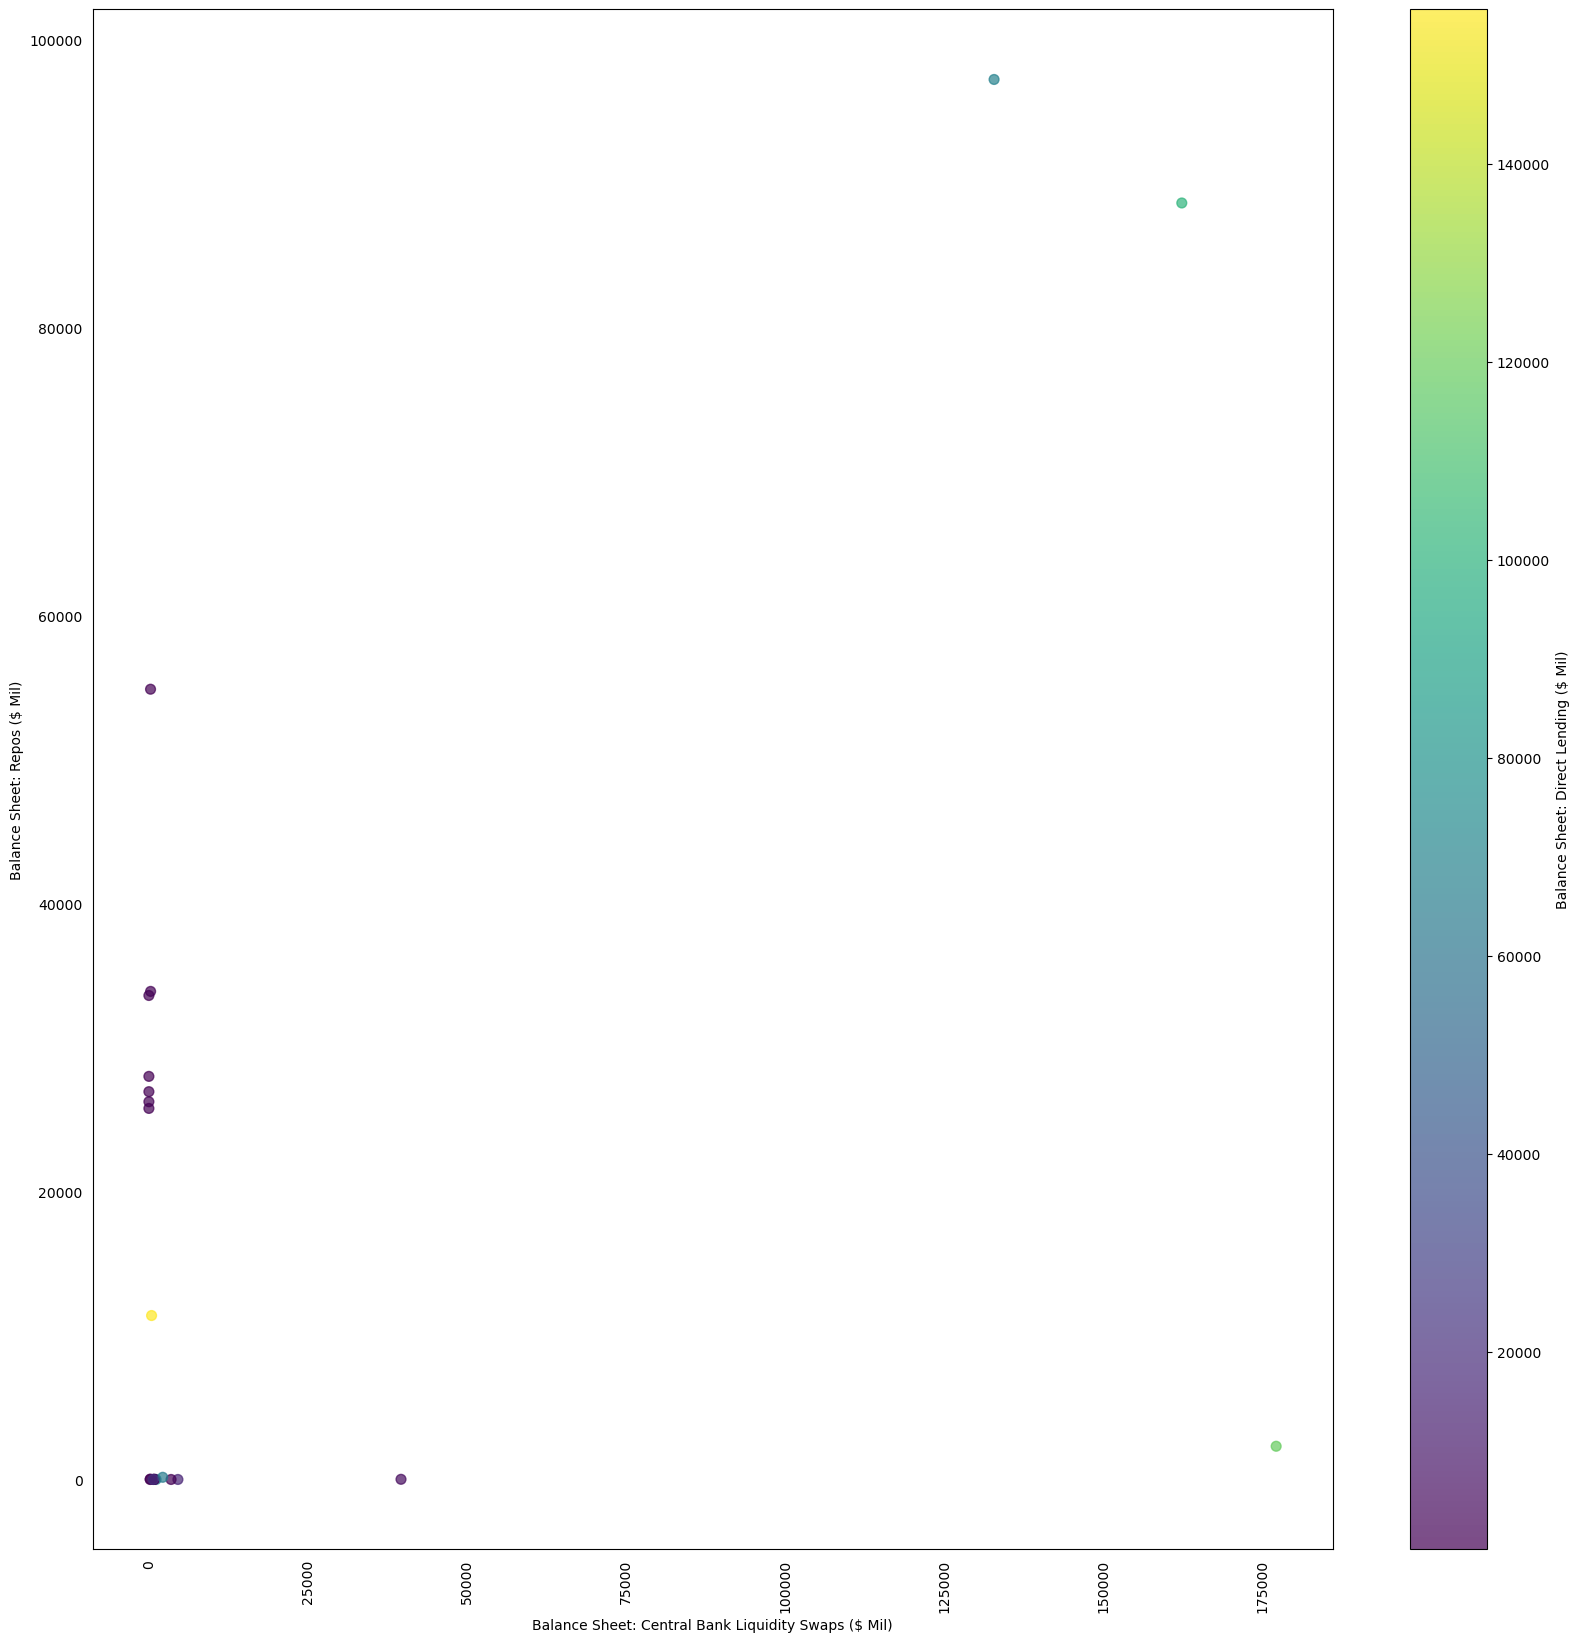

Balance Sheet: Central Bank Liquidity Swaps ($ Mil) Balance Sheet: Direct Lending ($ Mil) Balance Sheet: Repos ($ Mil)


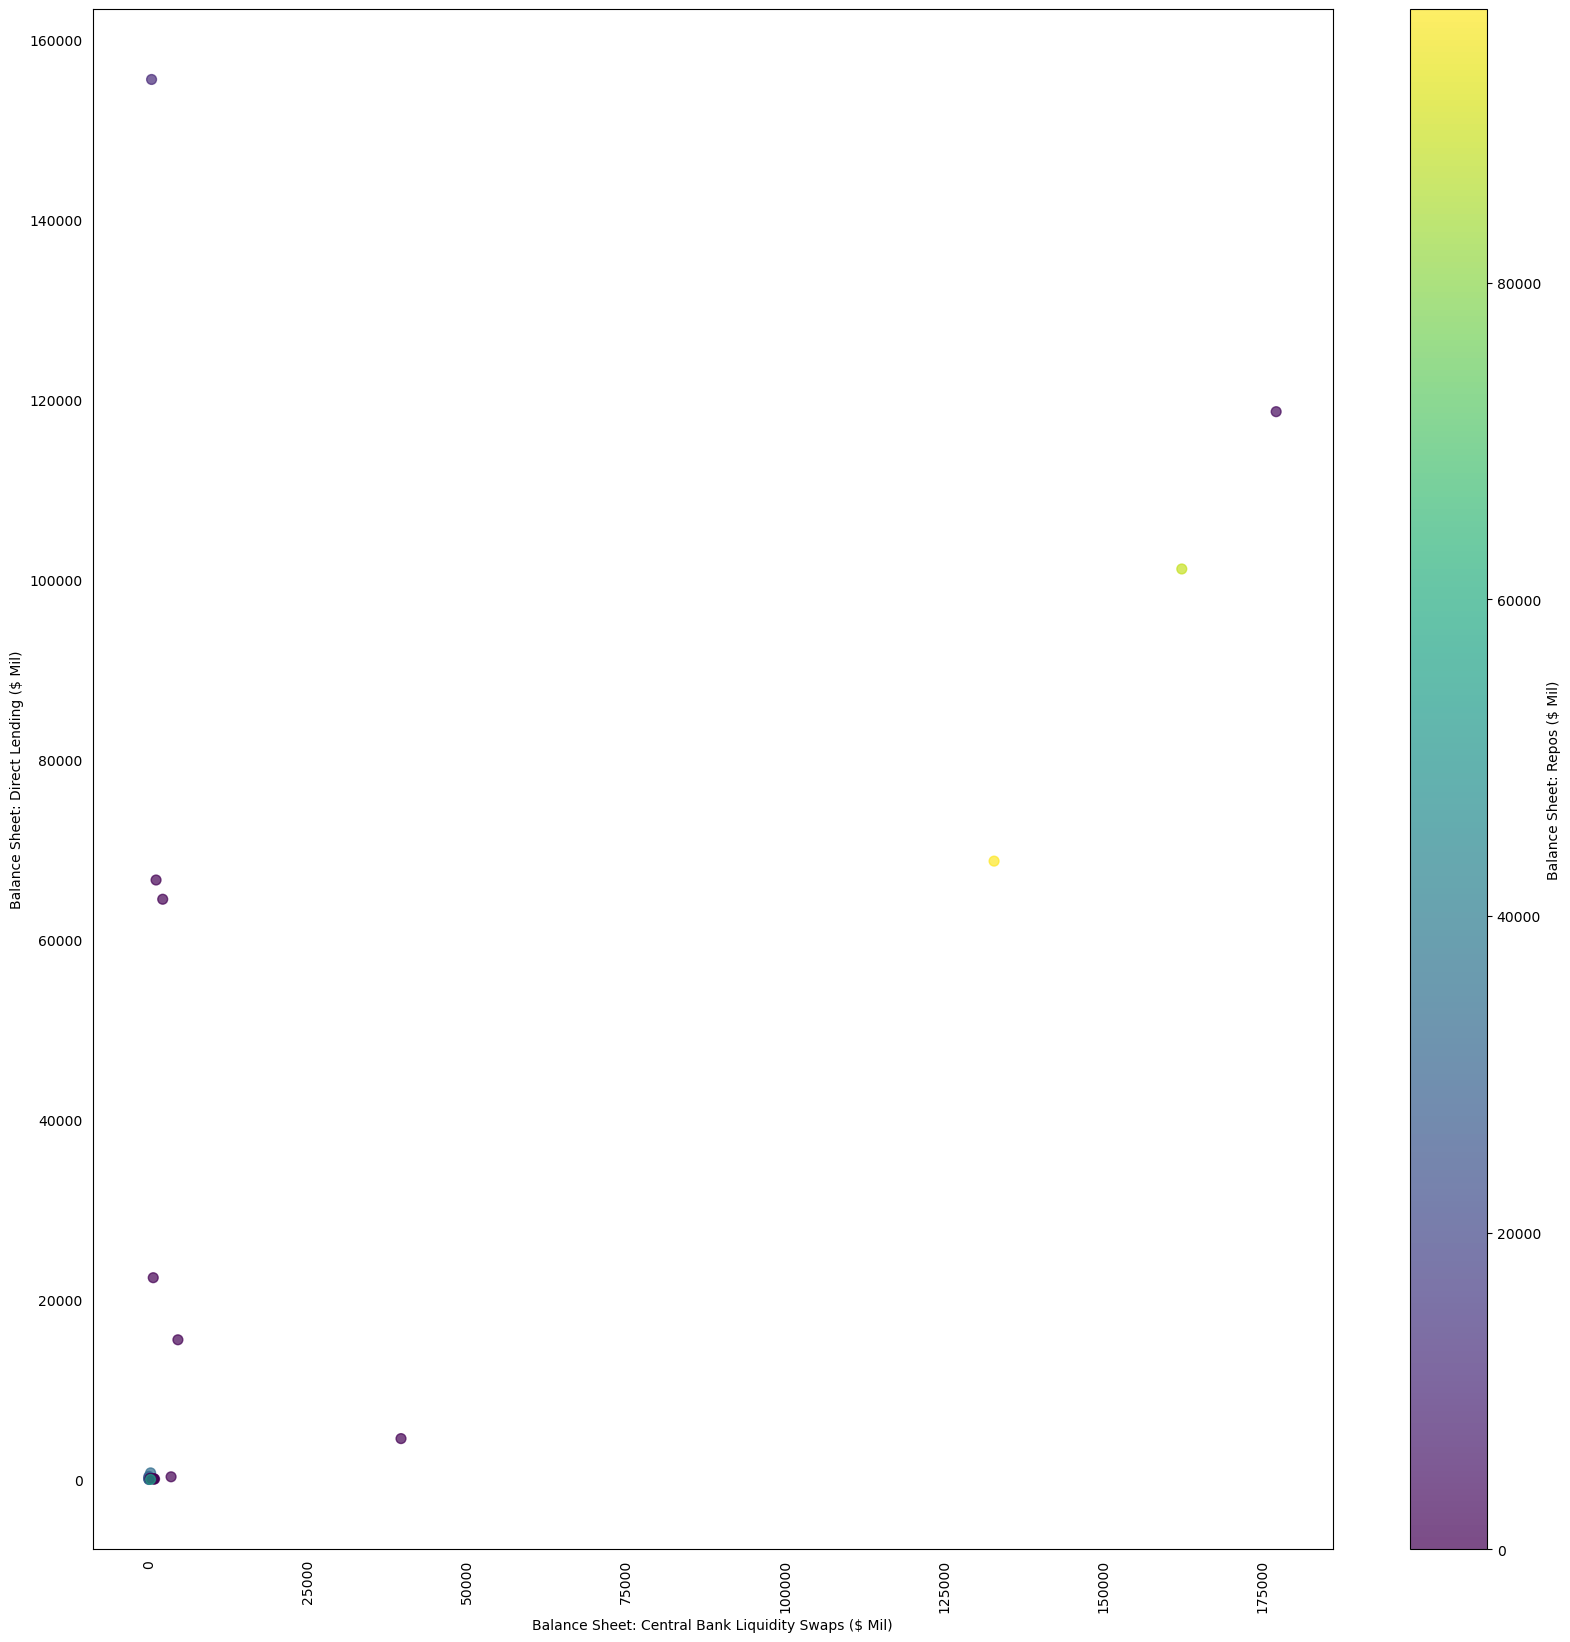

Balance Sheet: Direct Lending ($ Mil) Balance Sheet: Repos ($ Mil) Balance Sheet: Central Bank Liquidity Swaps ($ Mil)


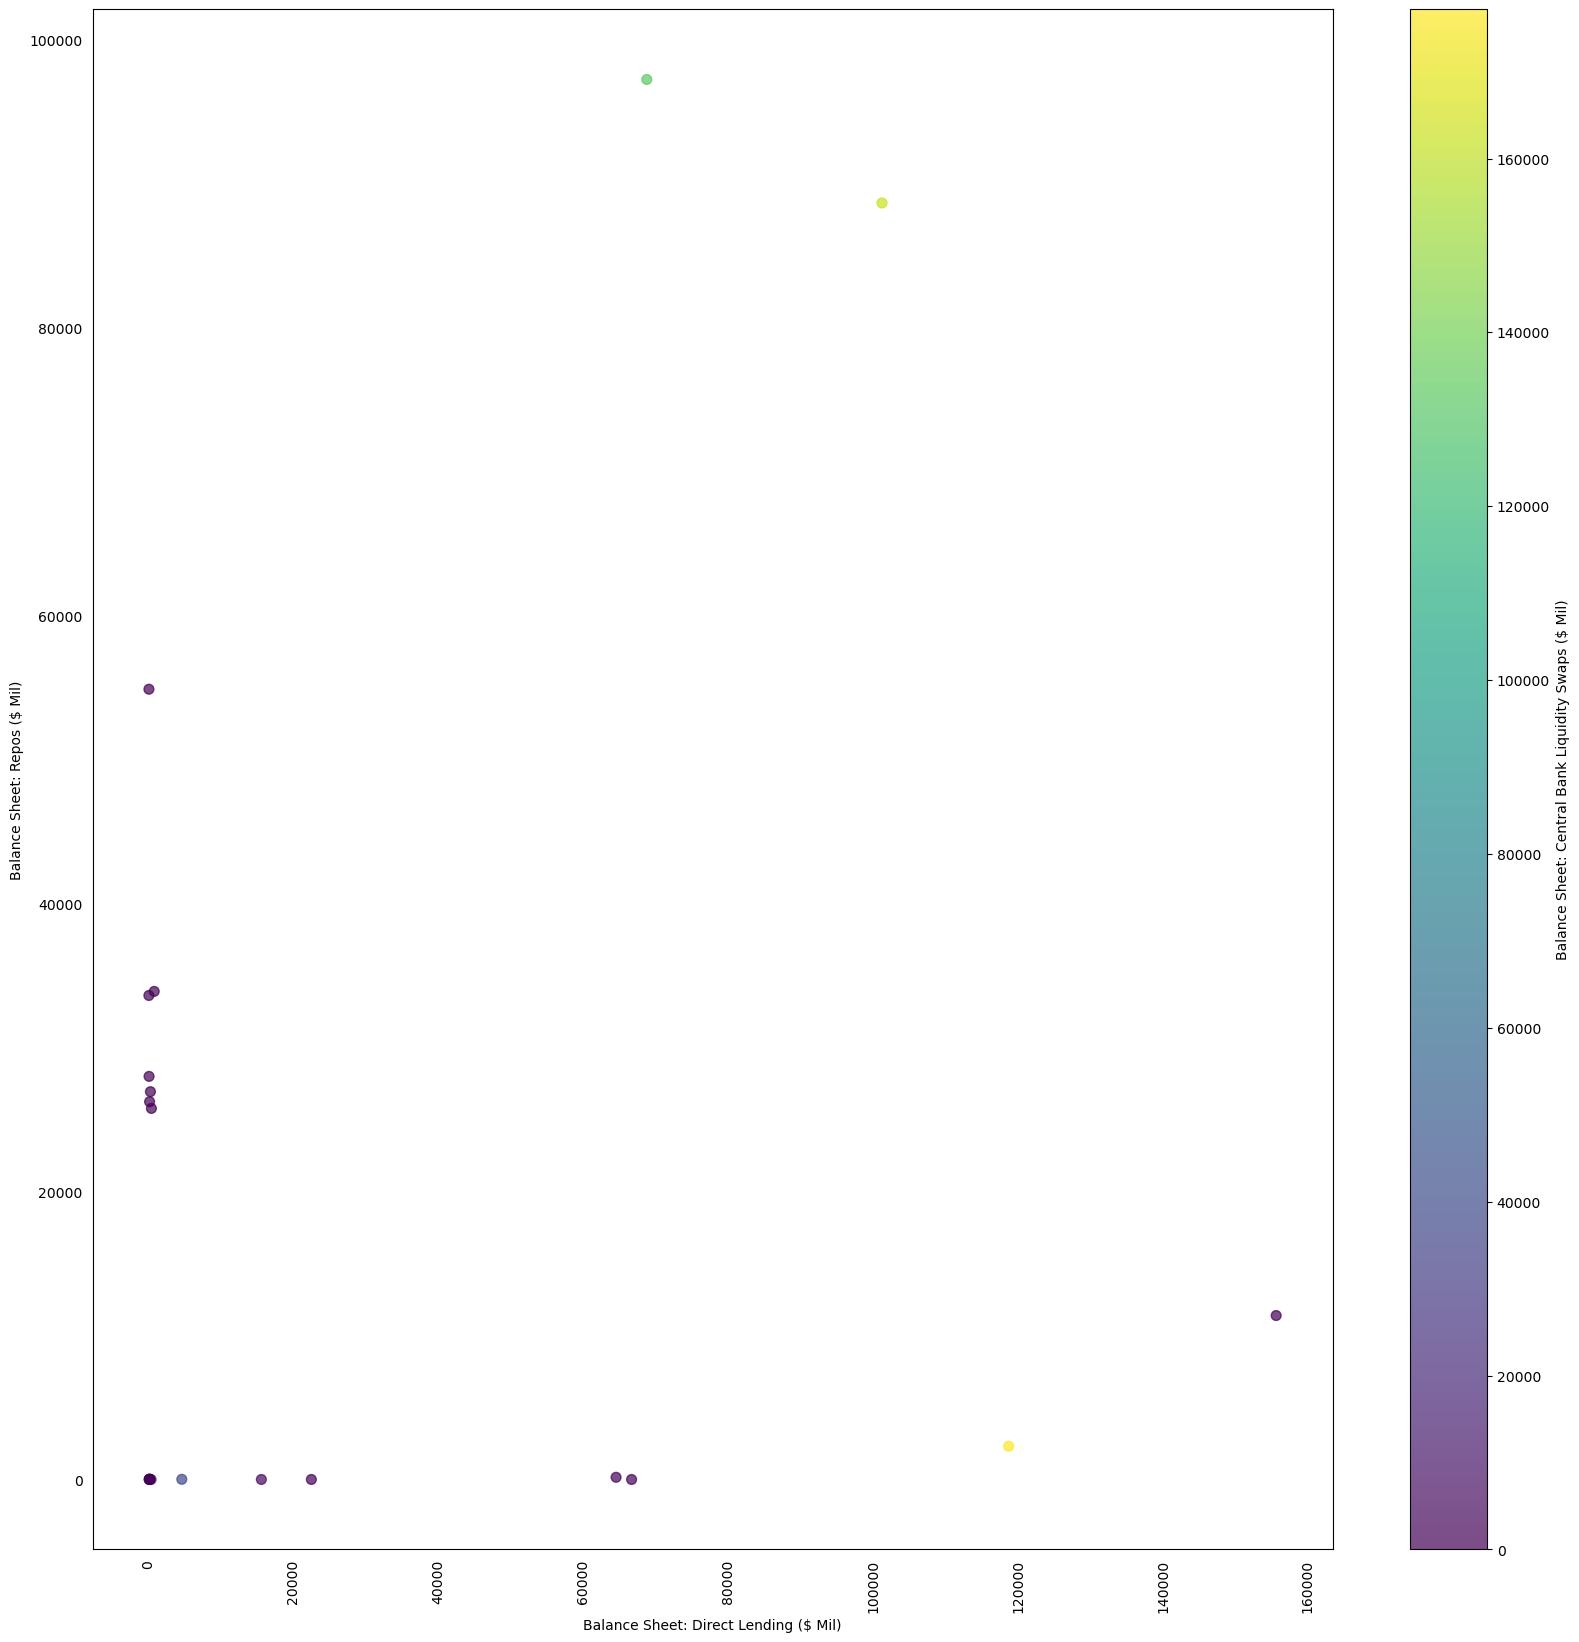

Balance Sheet: Direct Lending ($ Mil) Balance Sheet: Central Bank Liquidity Swaps ($ Mil) Balance Sheet: Repos ($ Mil)


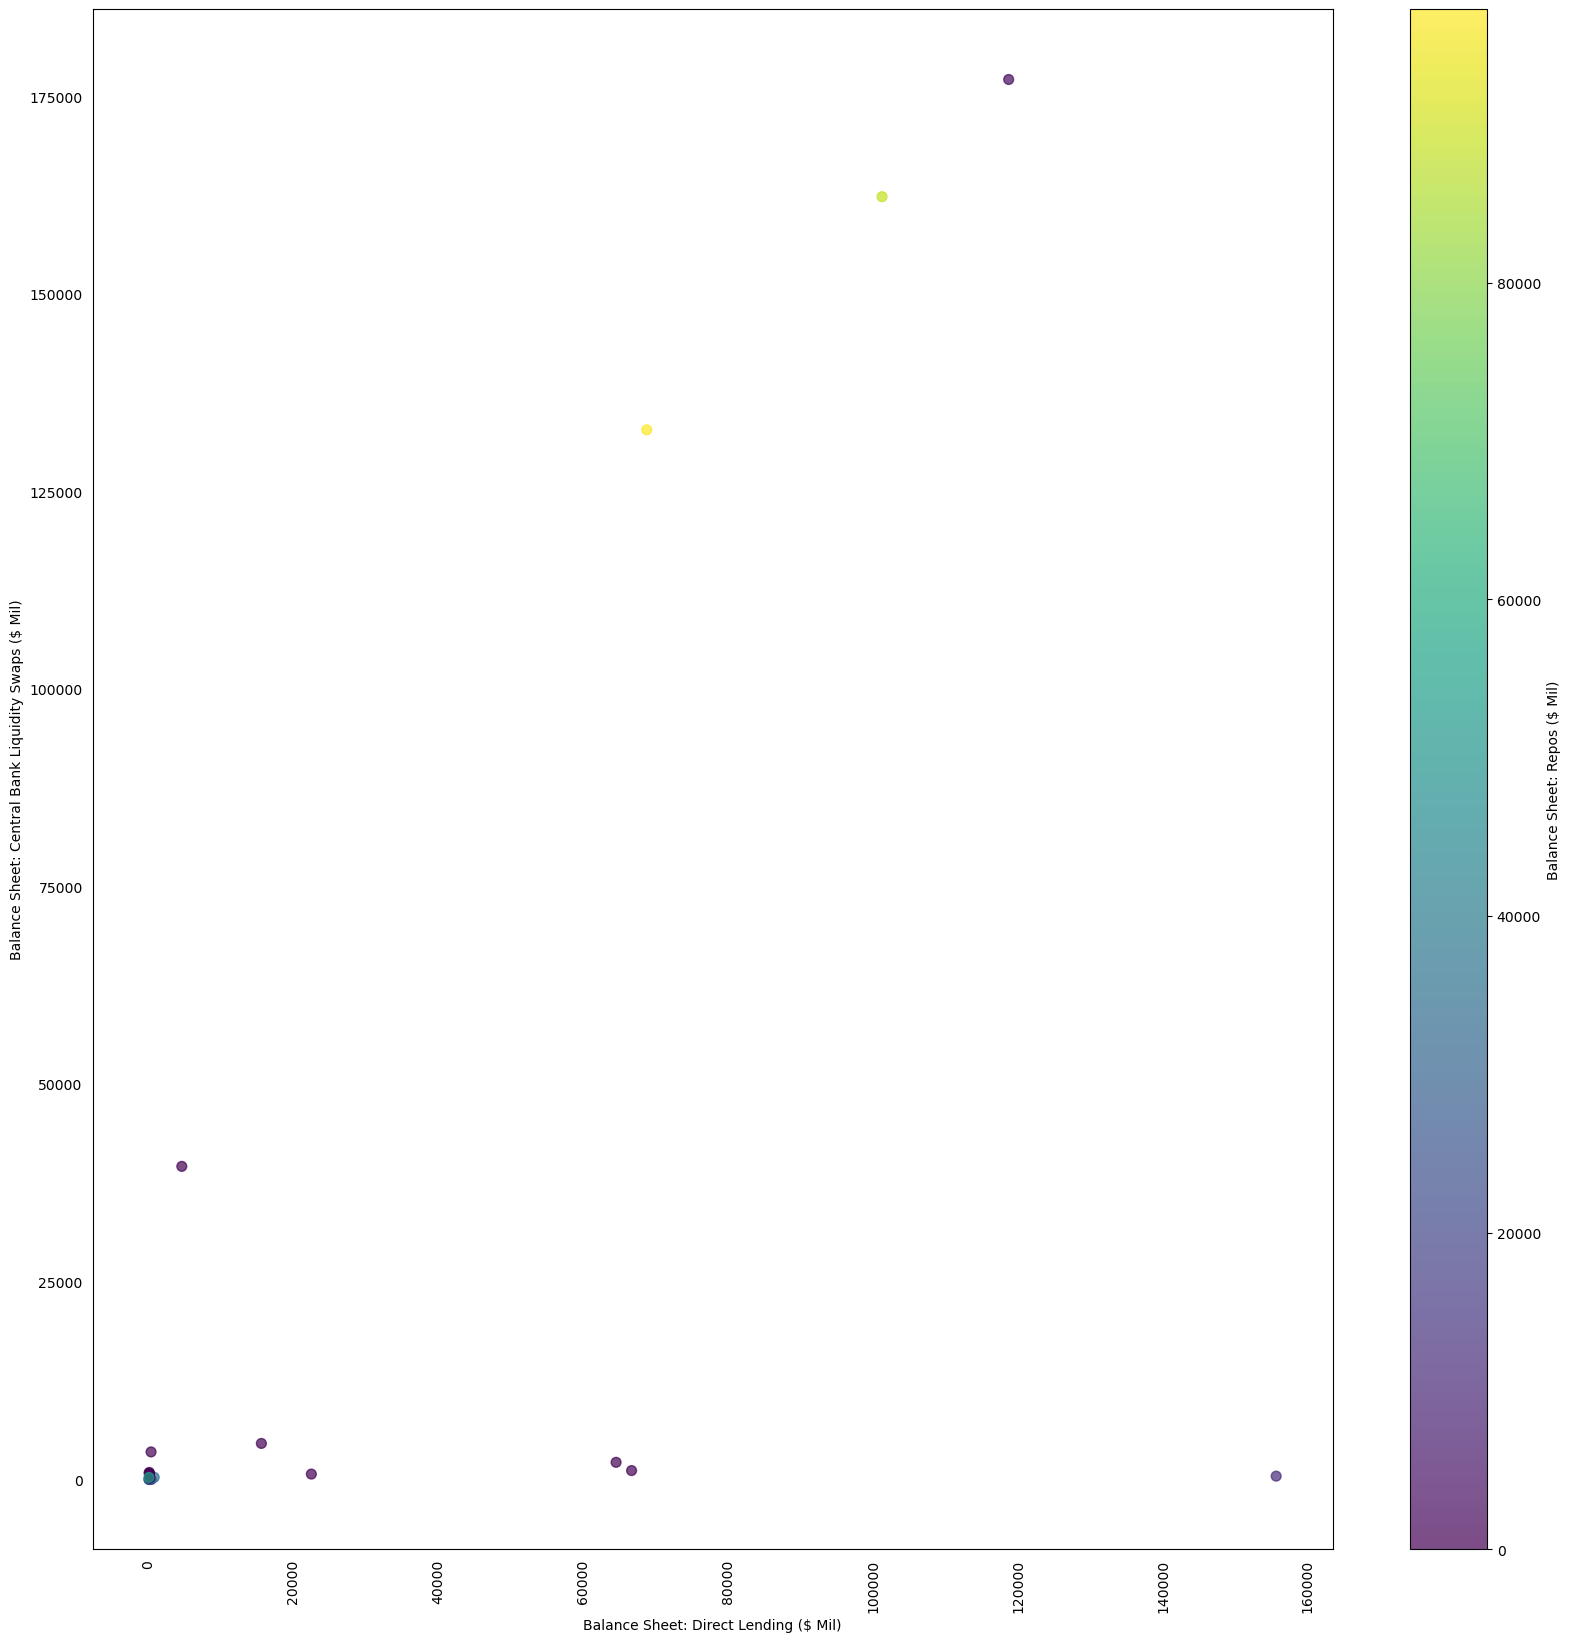

In [61]:
color_dim_scatter(data1, data1)

<AxesSubplot:xlabel='DATE'>

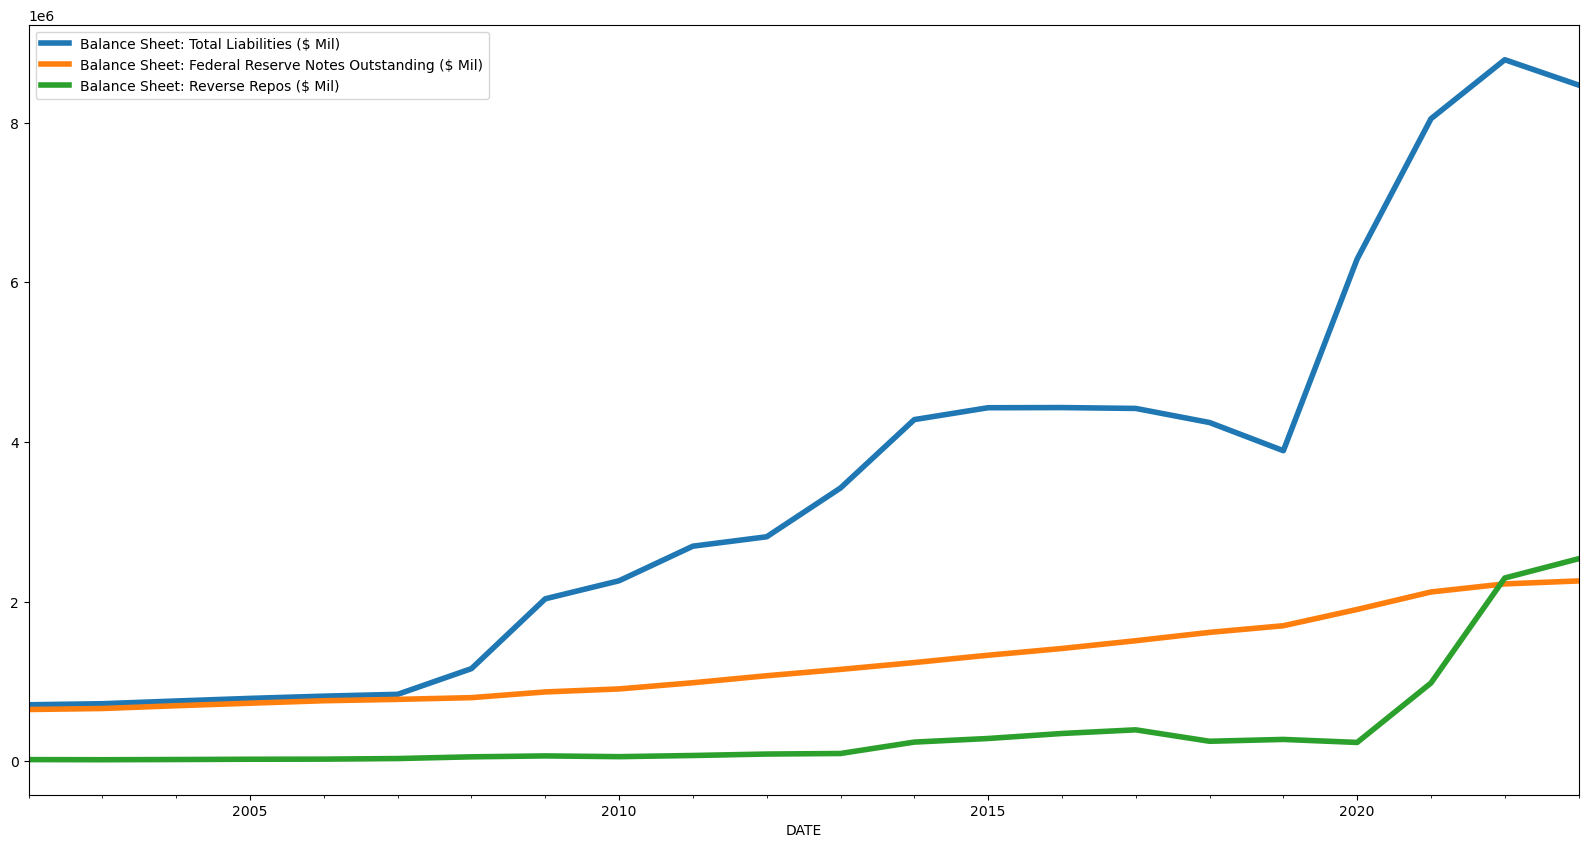

In [62]:
 # Liabilities
data_codes2={"Balance Sheet: Total Liabilities ($ Mil)" : "WLTLECL",
             "Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)" : "WLFN",
             "Balance Sheet: Reverse Repos ($ Mil)": "WLRRAL"}
start = datetime.datetime(2000,1,1)
end=datetime.datetime.today()
data2= gather_data(data_codes=data_codes2,
                 start= start,
                 end=end,
                 freq ="Y")
fig, ax=plt.subplots(figsize=(20,10))
data2.plot.line(linewidth=4,ax=ax)

This data is simular because it is all the liabilites the fed has in the economy

Balance Sheet: Total Liabilities ($ Mil) Balance Sheet: Federal Reserve Notes Outstanding ($ Mil) Balance Sheet: Reverse Repos ($ Mil)


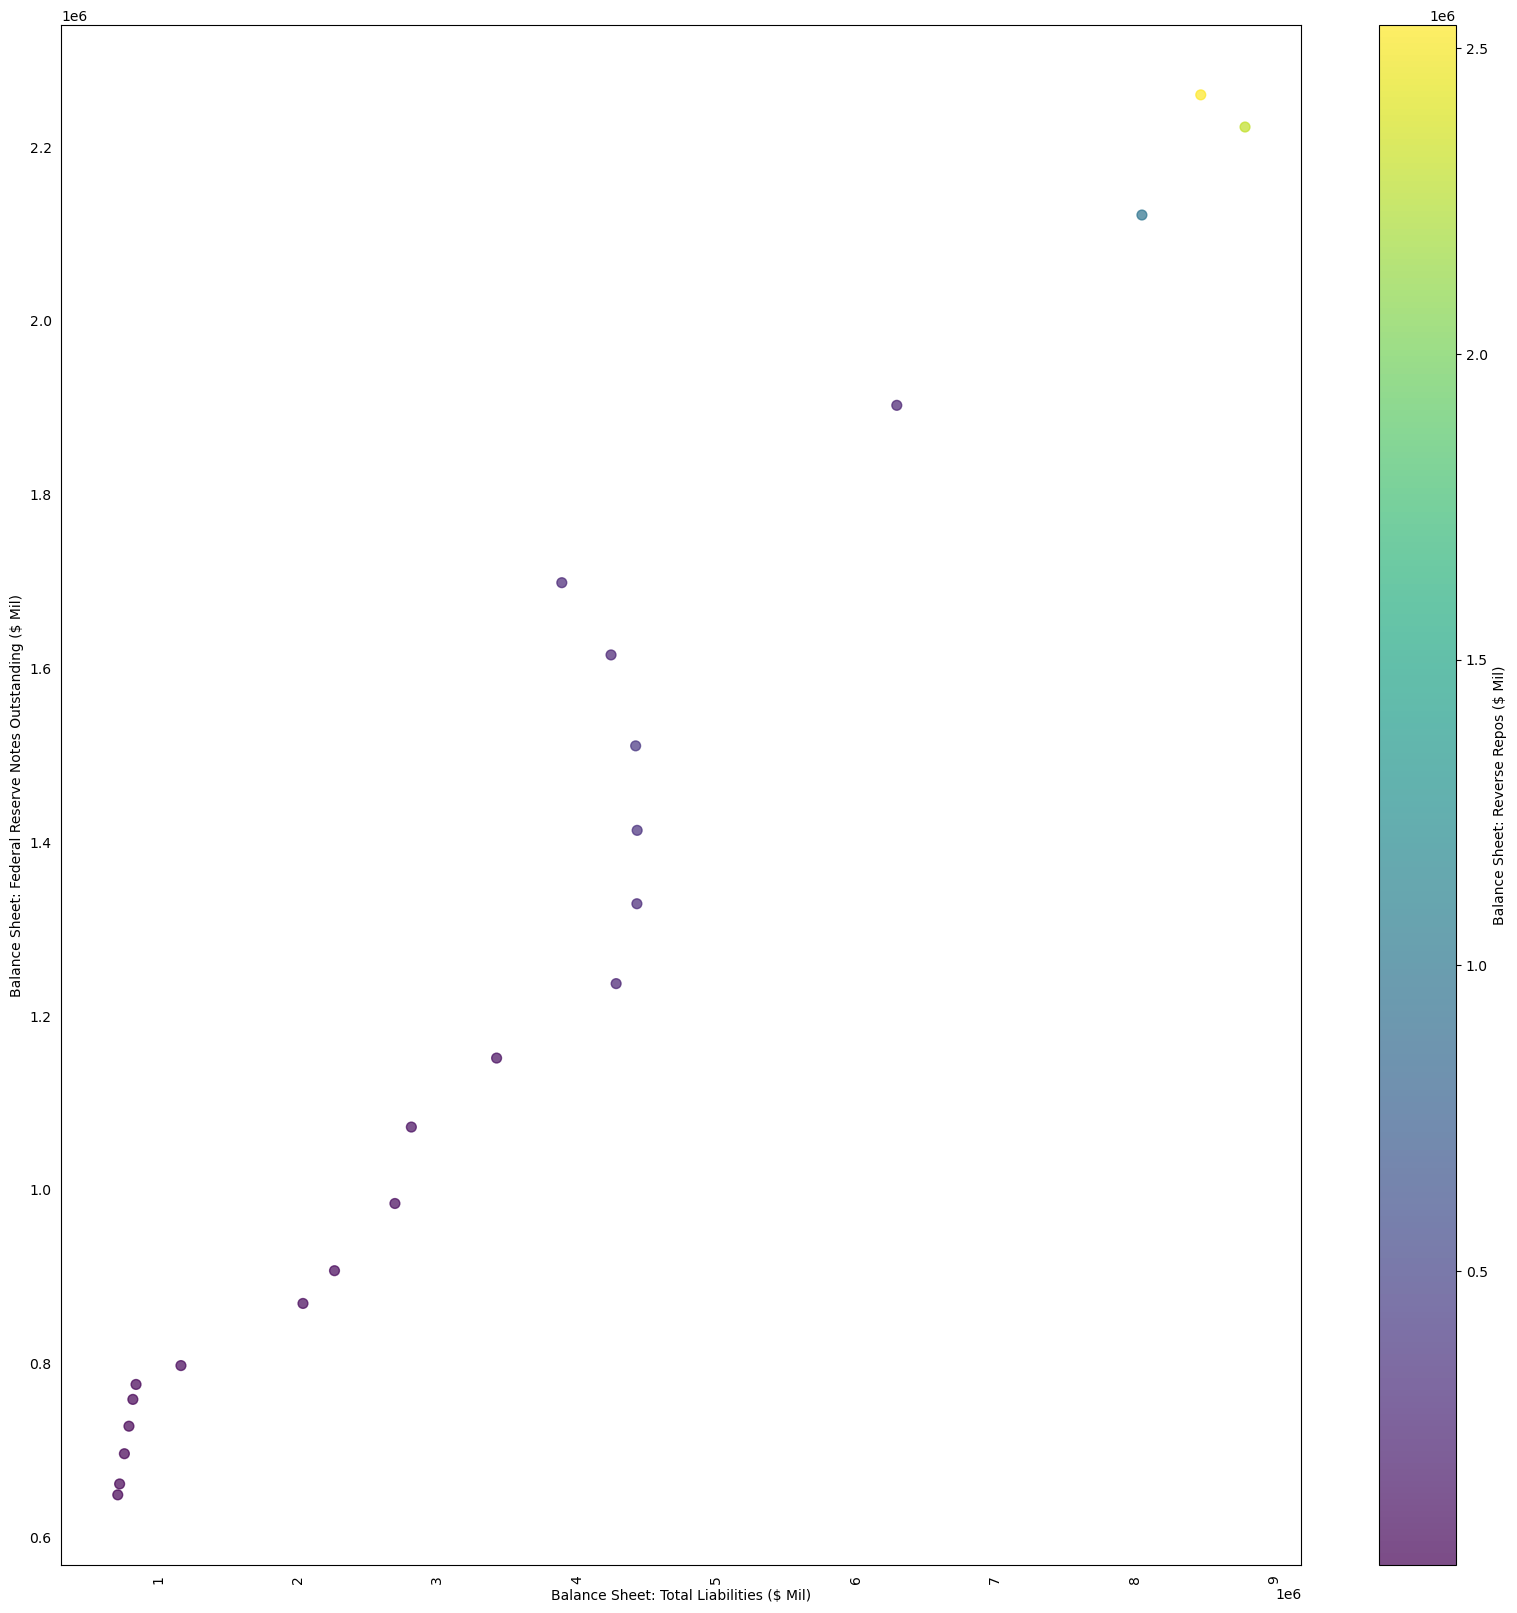

Balance Sheet: Total Liabilities ($ Mil) Balance Sheet: Reverse Repos ($ Mil) Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)


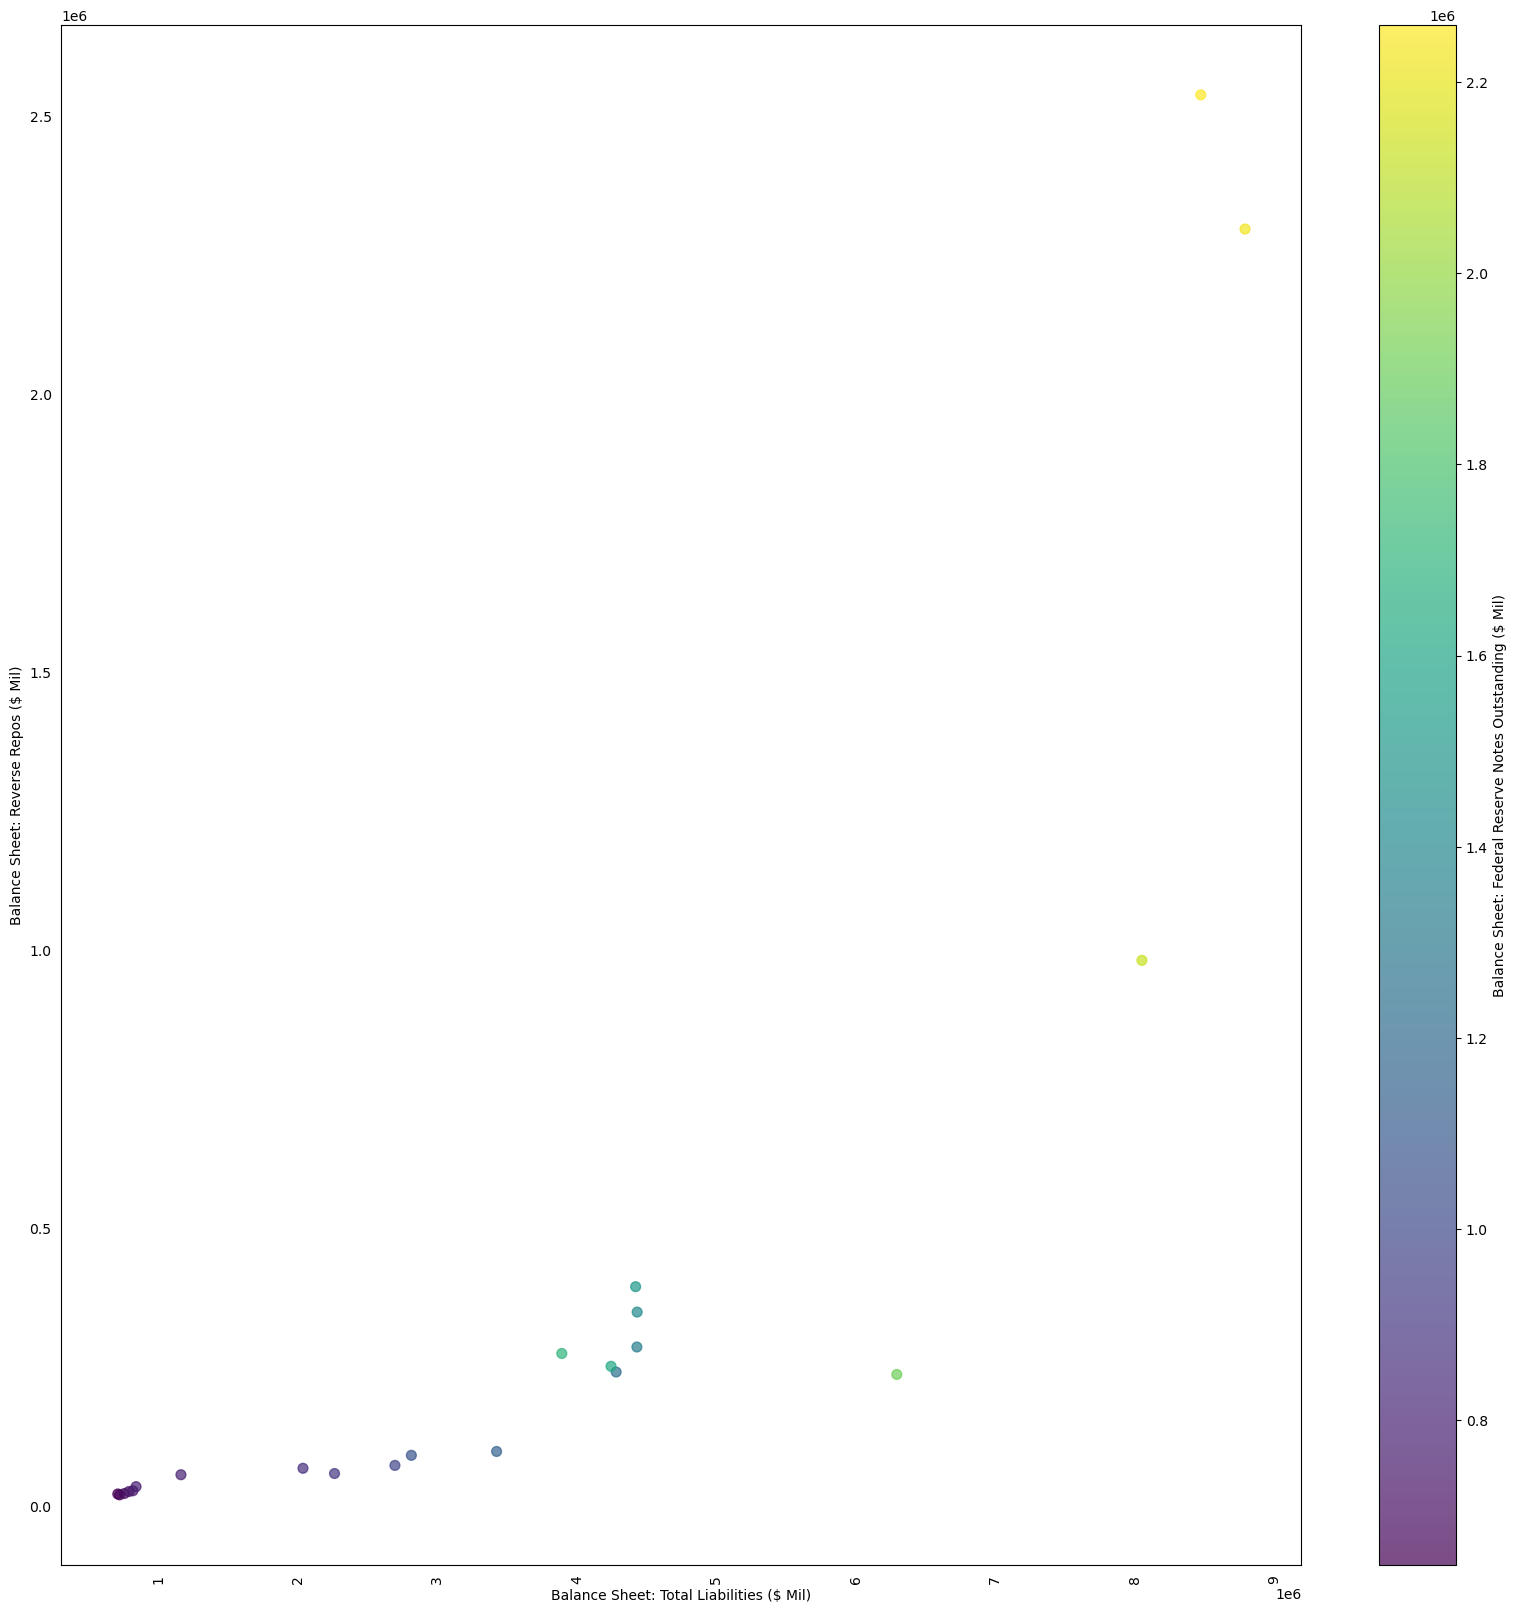

Balance Sheet: Federal Reserve Notes Outstanding ($ Mil) Balance Sheet: Total Liabilities ($ Mil) Balance Sheet: Reverse Repos ($ Mil)


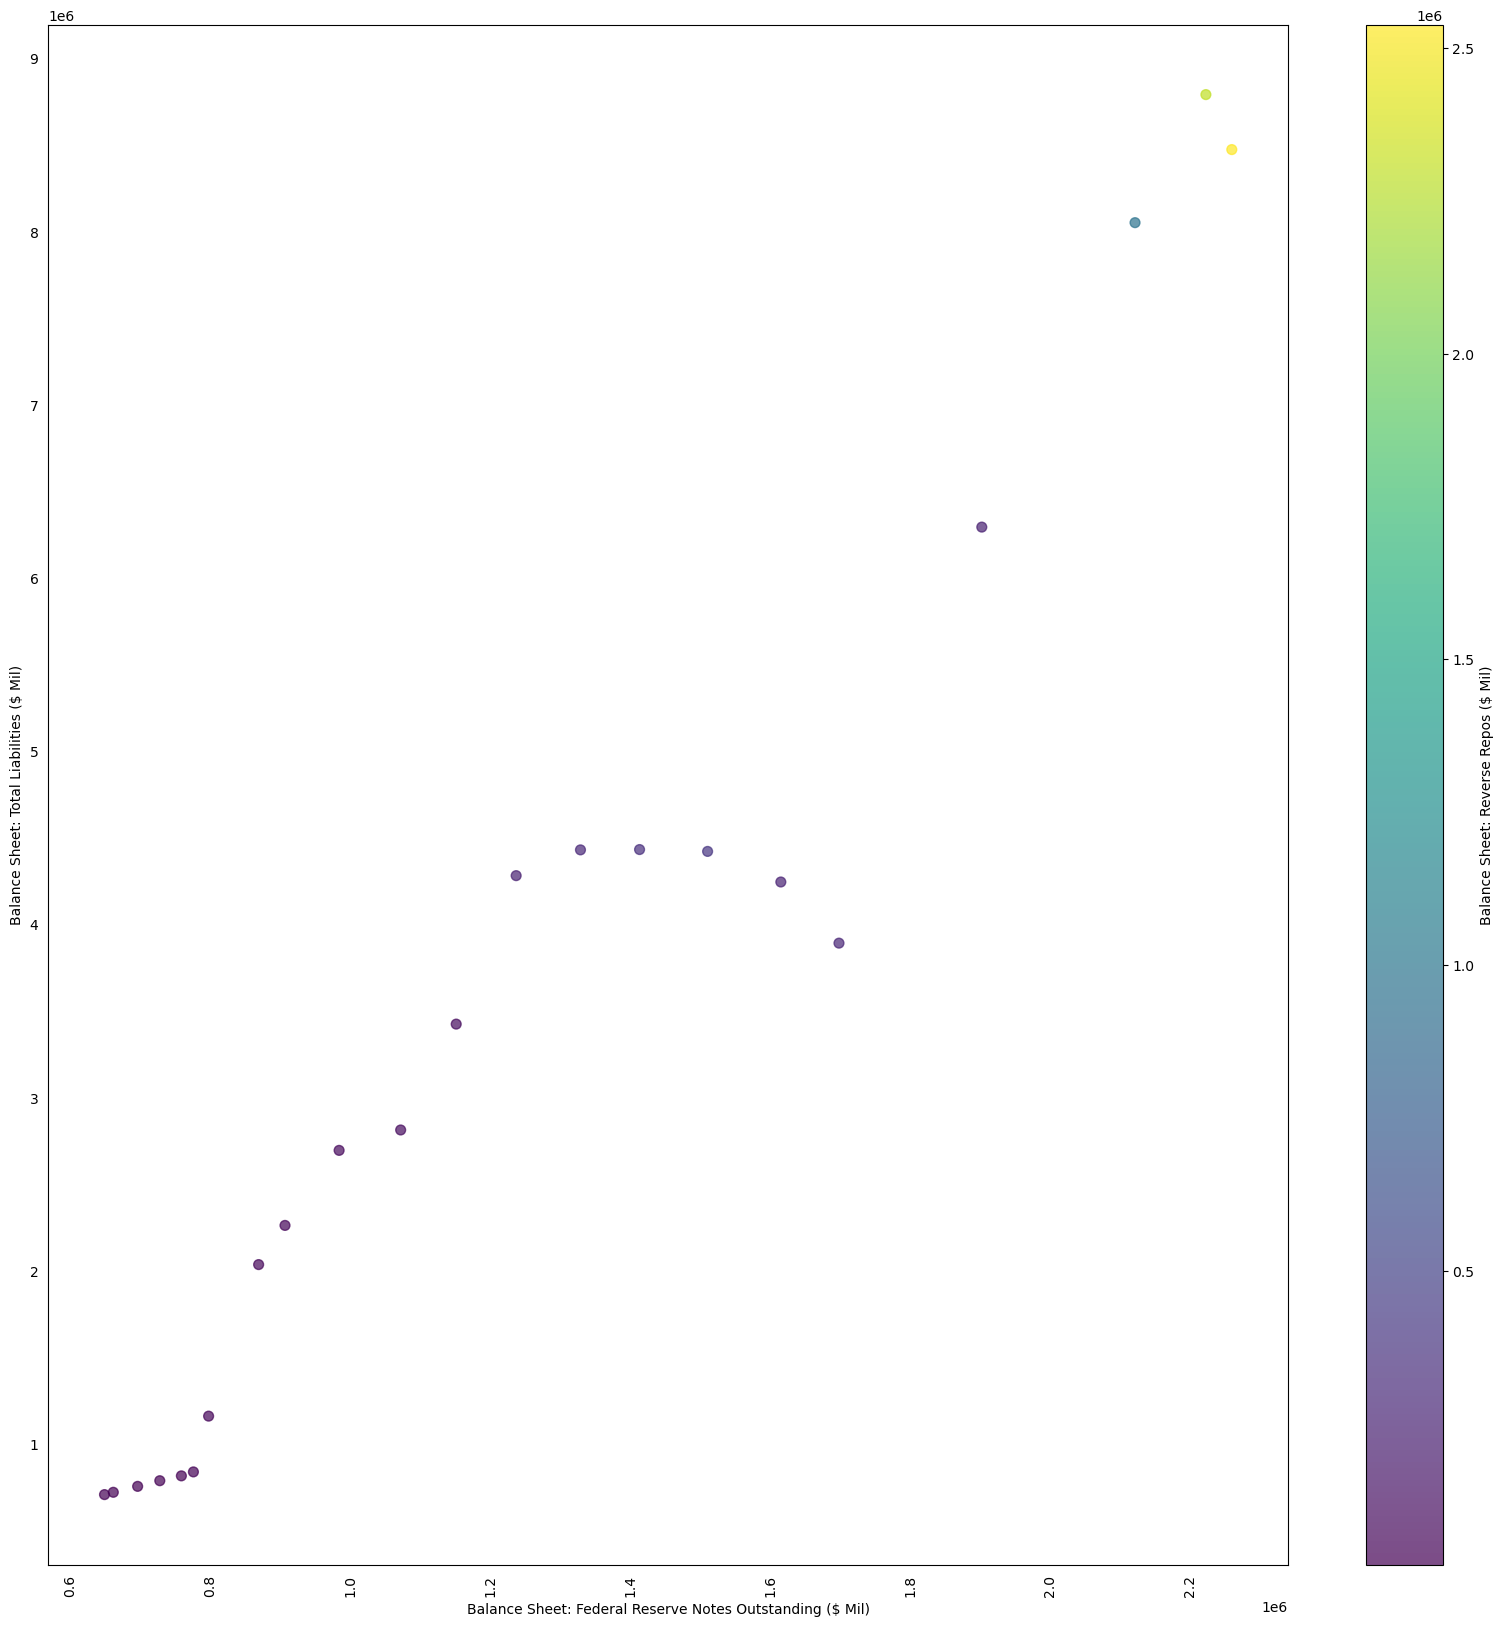

Balance Sheet: Federal Reserve Notes Outstanding ($ Mil) Balance Sheet: Reverse Repos ($ Mil) Balance Sheet: Total Liabilities ($ Mil)


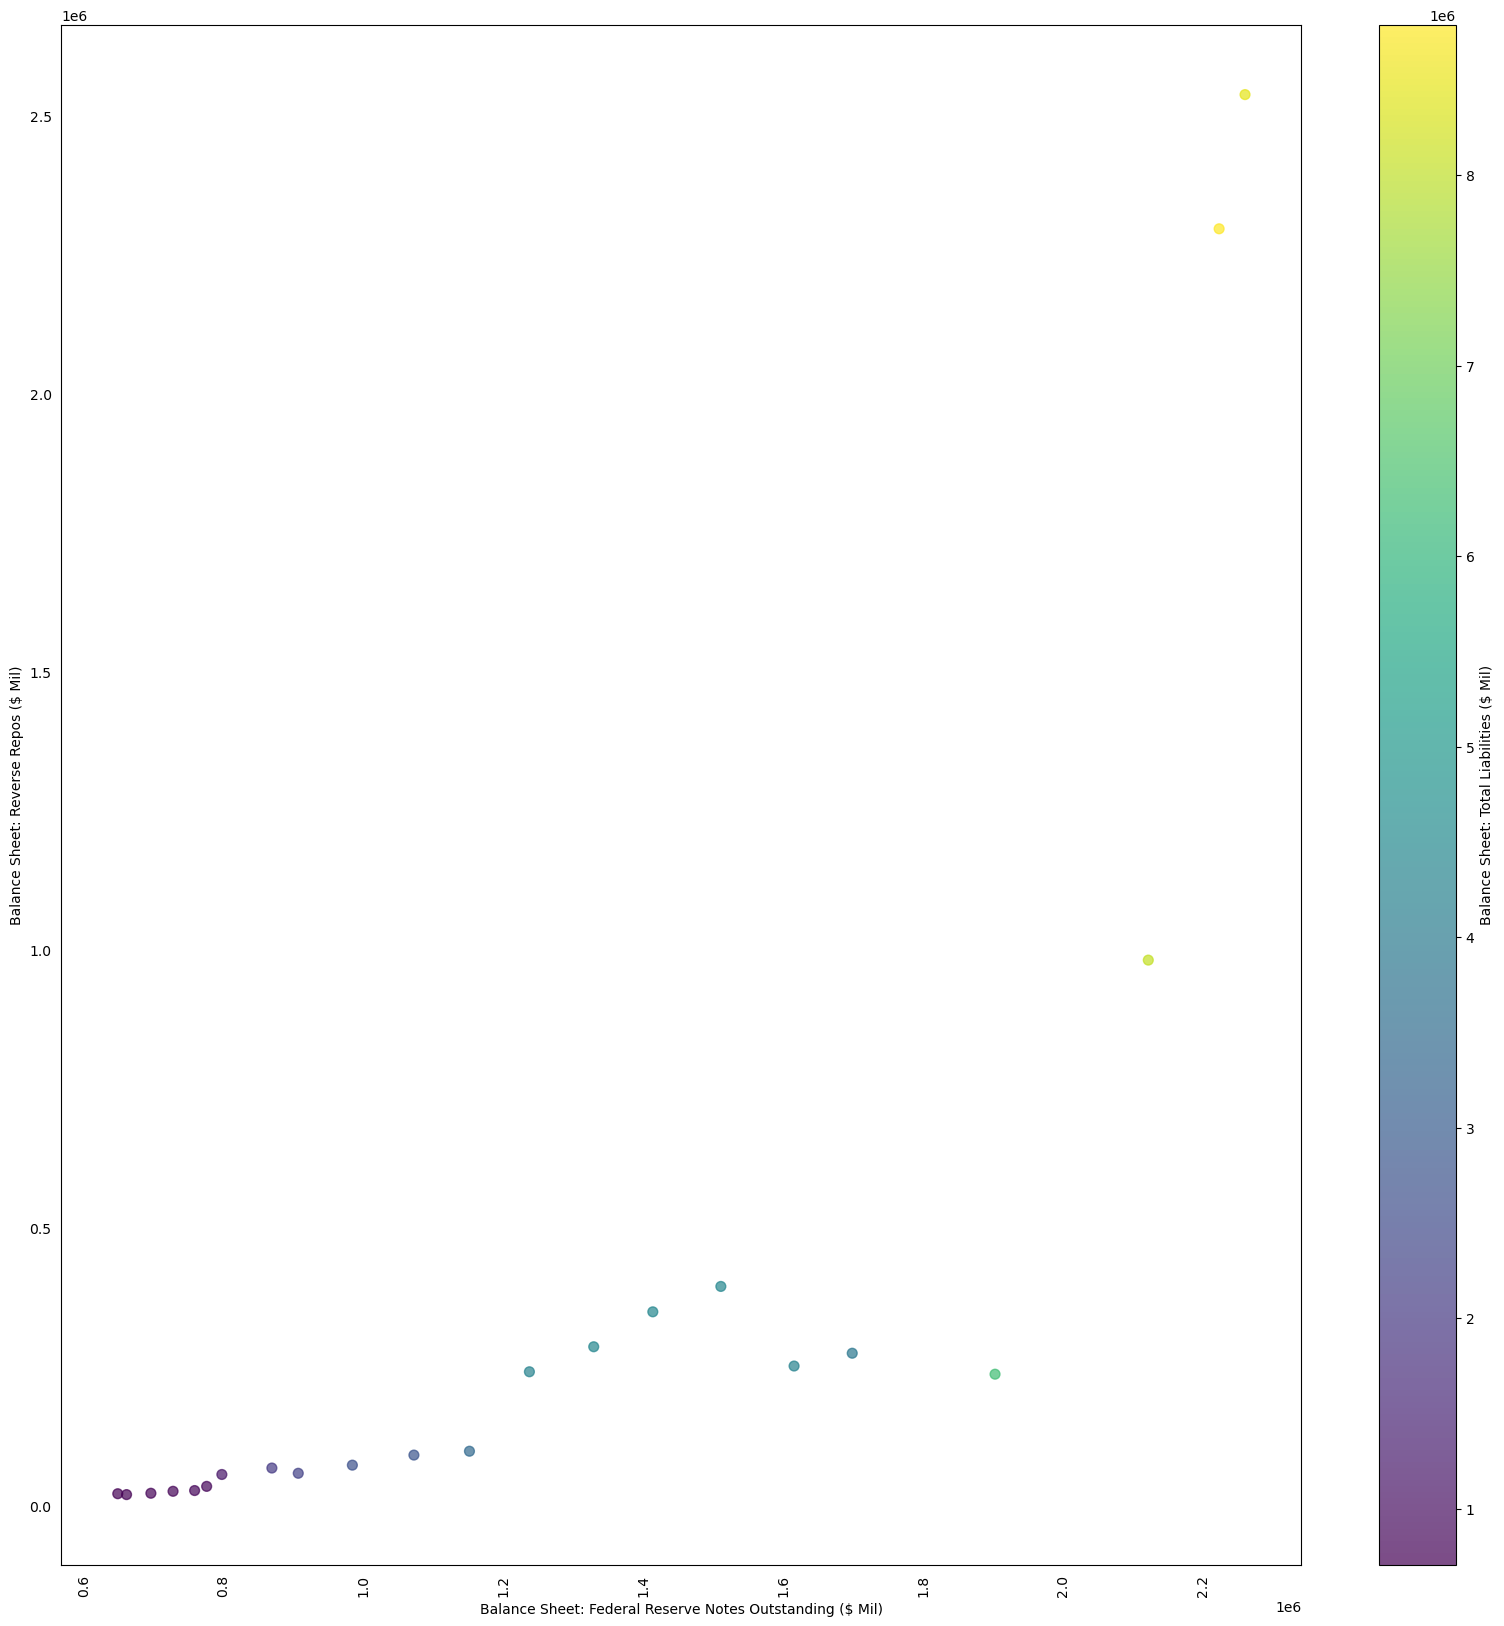

Balance Sheet: Reverse Repos ($ Mil) Balance Sheet: Total Liabilities ($ Mil) Balance Sheet: Federal Reserve Notes Outstanding ($ Mil)


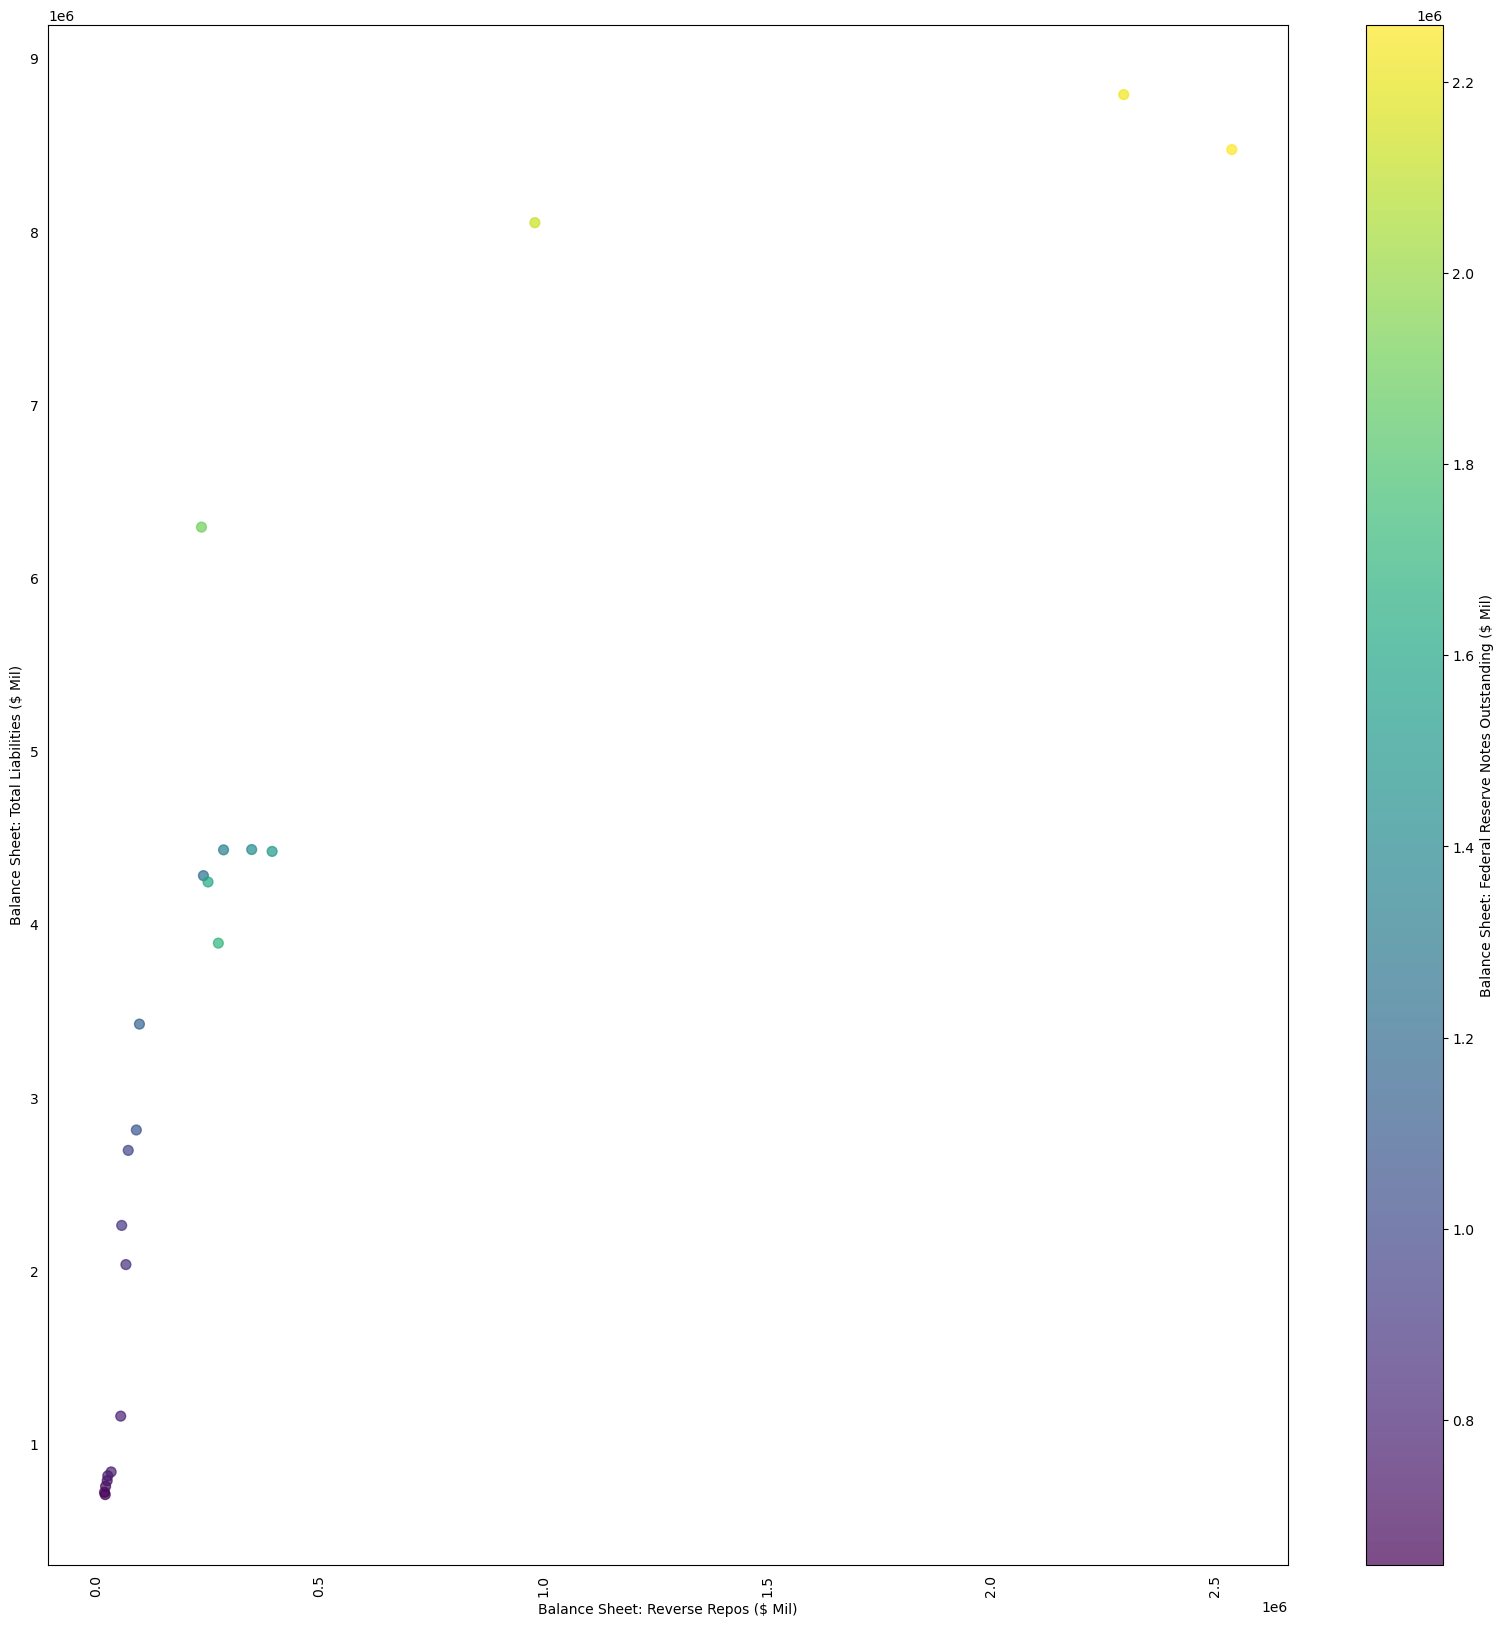

Balance Sheet: Reverse Repos ($ Mil) Balance Sheet: Federal Reserve Notes Outstanding ($ Mil) Balance Sheet: Total Liabilities ($ Mil)


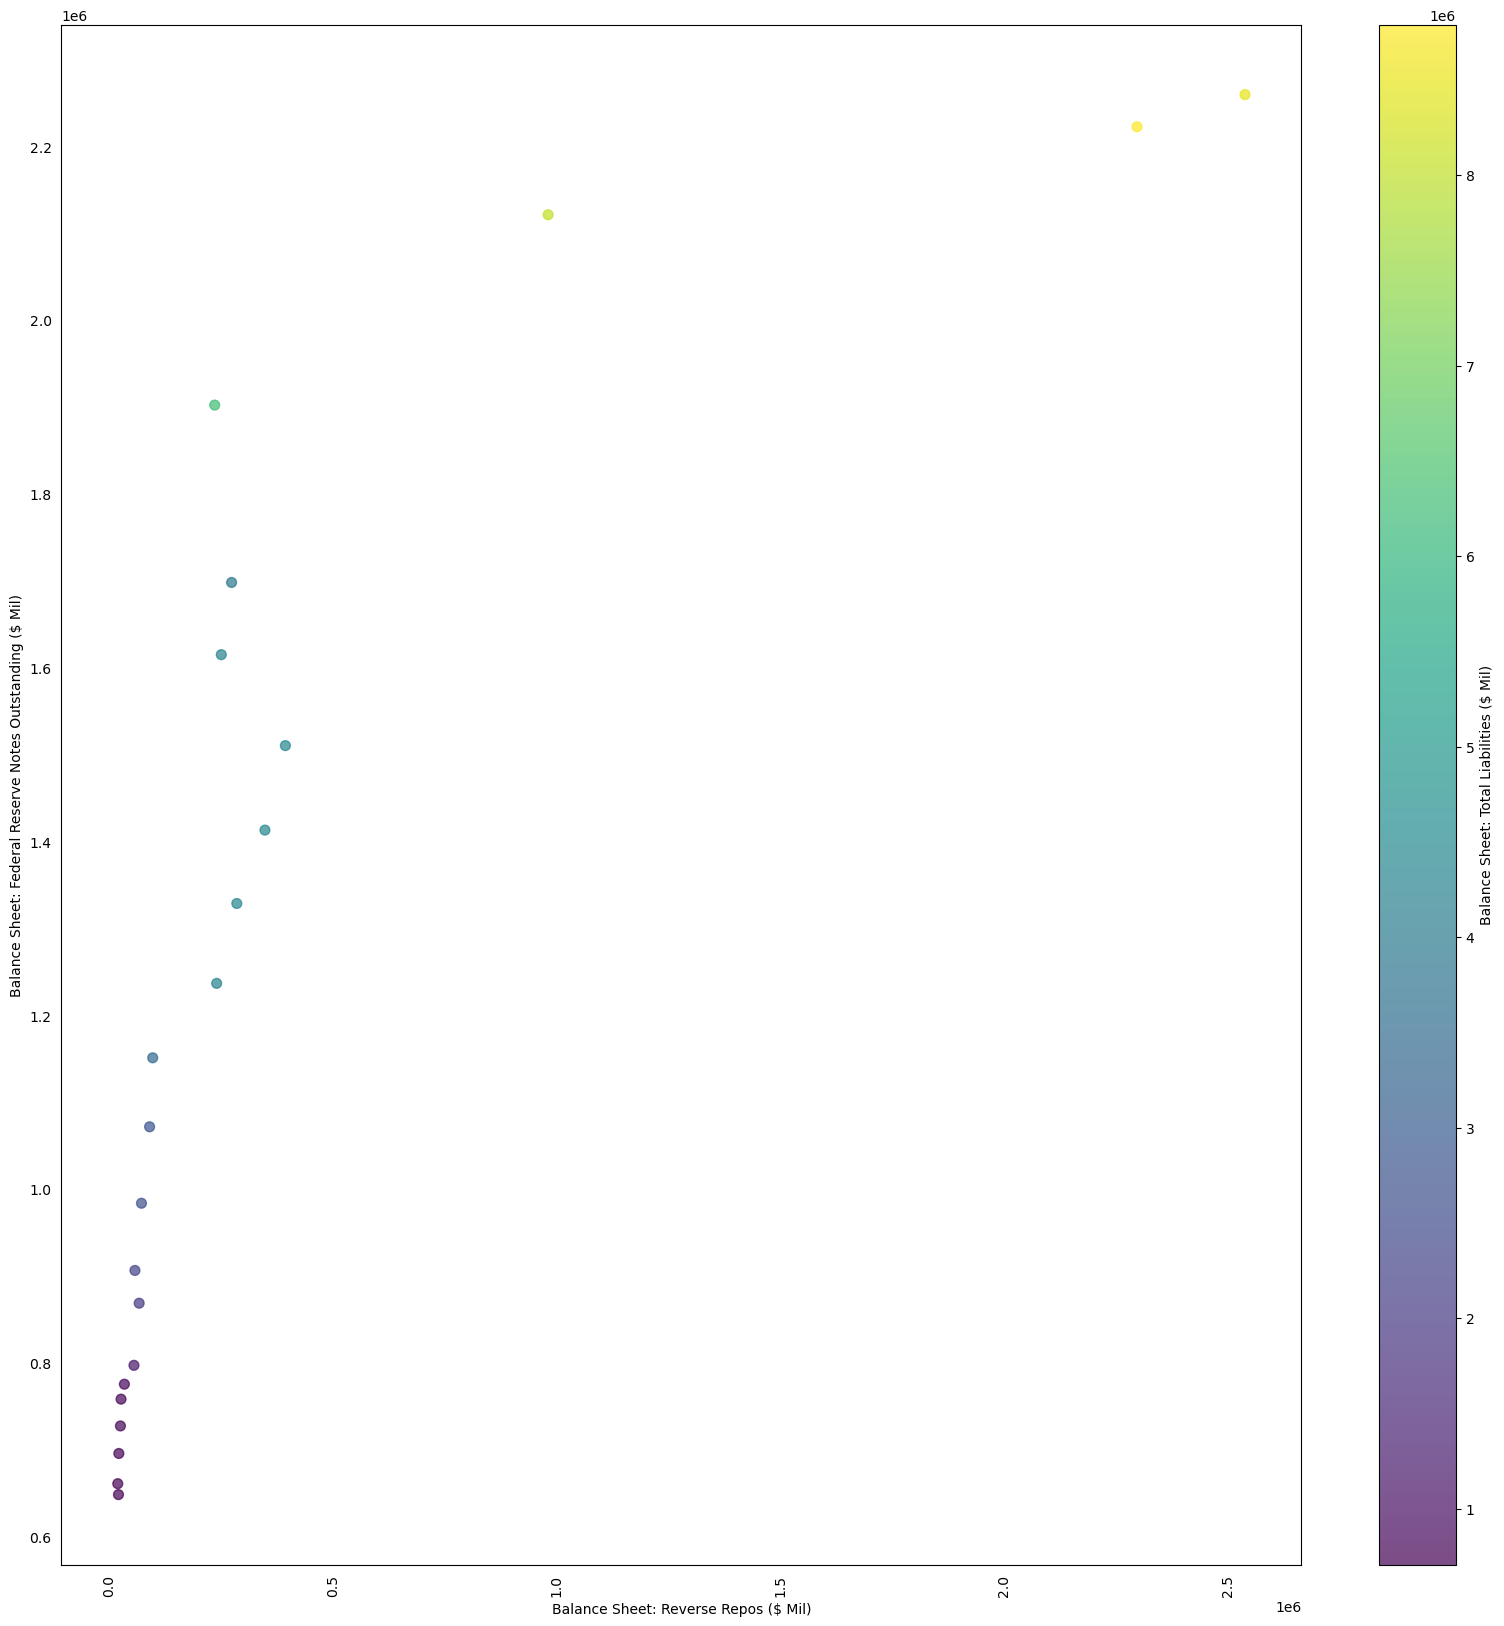

In [63]:
color_dim_scatter(data2, data2)

## 2

In [77]:
def corr_matrix_heatmap(data, pp):  
    fig, ax = plt.subplots(figsize=(20,20))   
    im = ax.imshow(data, norm = plt.cm.colors.Normalize(-1,1), cmap = "seismic")    
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size})  
    x_ticks = np.arange(num_vars)   
    plt.xticks(x_ticks, tick_labels, fontsize = tick_font_size, rotation = 90)   
    y_ticks = np.arange(len(labels))   
    plt.yticks(y_ticks, tick_labels, fontsize = tick_font_size)   
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, ha="center",   
                           va="center", color = "w")  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("Correlation", fontsize = 50, **title_font)  
    cbar = fig.colorbar(im)
    plt.show()
    plt.close()

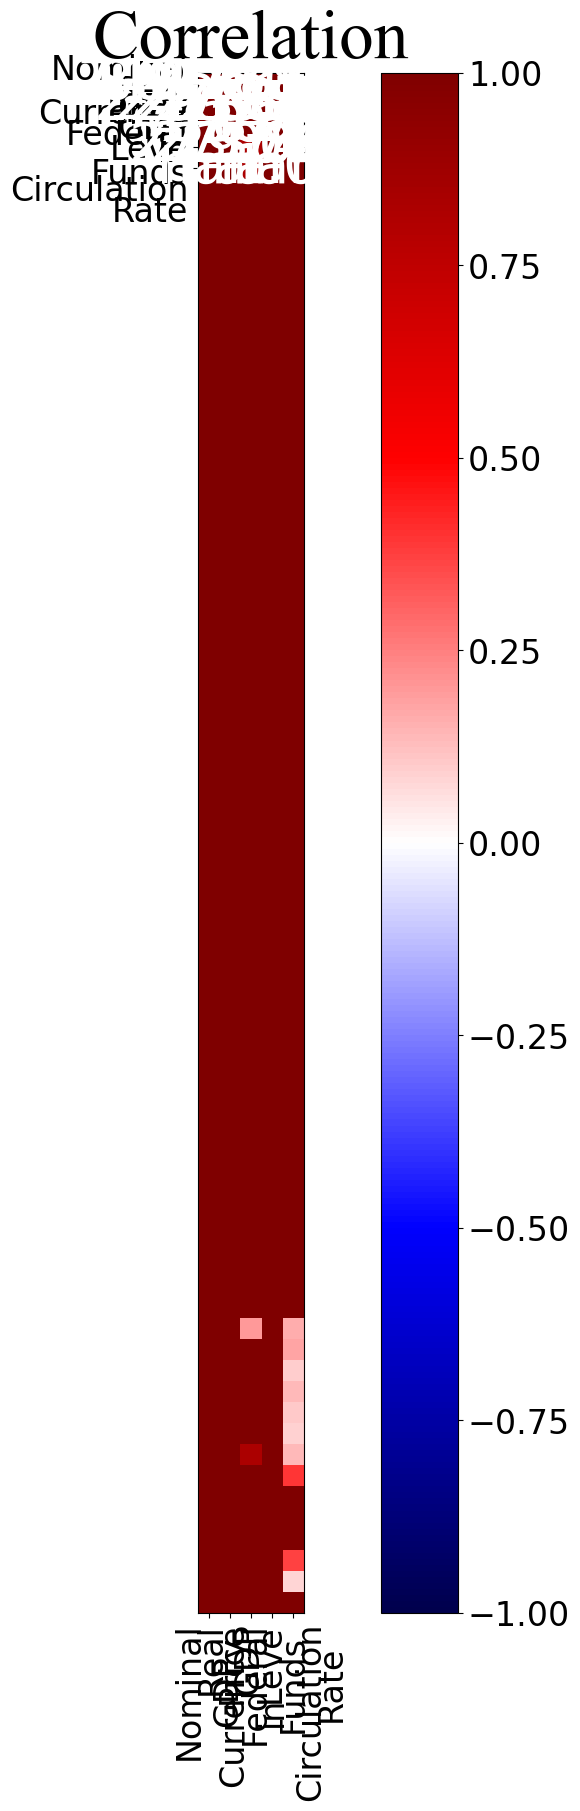

In [78]:
data_codes3={"Nominal GDP":"NGDPSAXDCUSQ",
            "Real GDP":"GDPC1",
            "Price Leve":"A191RI1Q225SBEA",
            "Currency in Circulation":"CURRCIR",
            "Federal Funds Rate":"DFF"}
start=datetime.datetime(1950,1,1)
end=datetime.datetime.today()
corr_data=gather_data(data_codes=data_codes3,
                 start= start,
                 end=end,
                 freq ="Y")
corr_matrix_heatmap(corr_data, data)